# 1. Giới thiệu dự án
**Vi-rút Corona** là một họ vi rút có thể gây bệnh, có thể thay đổi từ * cảm lạnh thông thường * và * ho * đến bệnh đôi khi nặng hơn. ** Hội chứng hô hấp Trung Đông (MERS-CoV) ** và ** Hội chứng hô hấp cấp tính nặng (SARS-CoV) ** là những trường hợp nghiêm trọng mà thế giới đã phải đối mặt. <br> ** SARS-CoV-2 (n -coronavirus) ** là loại virus mới thuộc họ coronavirus, được * phát hiện lần đầu tiên * vào năm 2019, chưa được xác định ở người trước đây.

Nó là một loại vi-rút *truyền nhiễm* bắt đầu từ ** Vũ Hán ** vào ** tháng 12 năm 2019 **. Sau đó được tuyên bố là ** Đại dịch ** bởi ** WHO ** do tỷ lệ lây lan cao trên toàn thế giới. Hiện tại (vào ngày 21 tháng 4 năm 2021), điều này dẫn đến tổng số 500.000+ Số ca tử vong trên toàn cầu. <br>

Đại dịch đang lan rộng trên toàn thế giới; nhận thức về sự lây lan này trở nên quan trọng hơn. NoteBook này là một nỗ lực để phân tích dữ liệu tích lũy của các trường hợp đã xác nhận, tử vong và đã được phục hồi theo thời gian.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center>
    </font>
 <center><font face = "Verdana" size ="4"> Mạnh mẽ lên, thế giới! Hãy an toàn và khỏe mạnh. </font><center>

<br>

# Mục lục
* [2. Tải xuống và cài đặt Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Tải xuống Tập dữ liệu và tìm hiểu dữ liệu](#3.-Downloading-the-Dataset)

* [4. Phân tích toàn cầu](#4.-Global-Analysis)

    * [Bài toán 1](#Problem-1)
    * [Bài toán 2](#Problem-2)
    * [Bài toán 3](#Problem-3)
    * [Bài toán 4](#Problem-4)
    * [Bài toán 5](#Problem-5)
    * [Bài toán 6](#Problem-6)
    * [Bài toán 7](#Problem-7)

* [5. Phân tích theo lục địa](#5.-Continent-Analysis)
    * [Bài toán 8](#Problem-8)
    * [Bài toán 9](#Problem-9)
    * [Bài toán 10](#Problem-10)
    * [Bài toán 11](#Problem-11)
    * [Bài toán 12](#Problem-12)
    * [Bài toán 13](#Problem-13)

* [6. Phân tích theo quốc gia](#5.-Country-Analysis)
    * [Bài toán 14](#Problem-14)
    * [Bài toán 15](#Problem-15)
    * [Bài toán 16](#Problem-16)
    * [Bài toán 17](#Problem-17)
    
* [7. Phân tích nâng cao](#7.-Advanced-Analysis)
    * [Bài toán 18](#Problem-18)
    * [Bài toán 19](#Problem-19)
    * [Bài toán 20](#Problem-20)
    * [Bài toán 21](#Problem-21)
    * [Bài toán 22](#Problem-22)

# 2. Tải xuống và Cài đặt Prerequisite
**pycountry_convert**: Sử dụng dữ liệu quốc gia lấy từ wikipedia, gói này cung cấp các chức năng chuyển đổi giữa tên quốc gia ISO, mã quốc gia và tên lục địa.

**folium, seaborn, plotly**: Một số gói trực quan hóa trong Python.

Bỏ ghi chú và cài đặt một số gói nếu bạn chưa cài đặt chúng. Nếu không, hãy tiếp tục.

In [1]:

!pip install pycountry_convert
!pip install folium
!pip install seaborn
!pip install plotly



     --------------------------------------- 10.1/10.1 MB 17.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ------------------------------------- 204.4/204.4 kB 12.1 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681895 sha256=1aec0a4847f5166bc18e8e9c35c71776311167e08c288c102ec9d3b44cbf3fa1
  Stored in directory: c:\users\truon\appdata\local\pip\cache\wheels\47\15\92\e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry


In [1]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pycountry_convert as pc
import folium
from pycountry_convert import country_mappings as cm
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Tải xuống tập dữ liệu và tìm hiểu dữ liệu
Sau khi tải xuống tập dữ liệu, hãy trả lời các câu hỏi sau:
- Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu.
- Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 bộ dữ liệu.
- Xác định có bao nhiêu quốc gia trong dữ liệu này.
- Tính tổng số ngày có trong 3 bộ dữ liệu
Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố.
- Xác định quốc gia và ngày mà có số ca Covid nhiều nhất.
- Xác định quốc gia có tổng số người mất do Covid là nhiều nhất.
- Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam.

Tập dữ liệu này được cập nhật hàng ngày bởi Johns Hopkins CSSE.

In [2]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
confirmed_df = confirmed_df.loc[:,:"8/4/21"]
deaths_df = deaths_df.loc[:,:"8/4/21"]
recoveries_df = recoveries_df.loc[:,:"8/4/21"]

## Hãy xem dữ liệu tổng quan:

In [4]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...   144285   145008   145552   
1        0        0        0        0  ...   132891   132922   132952   
2        0        0        0        0  ...   163660   165204   167131   
3        0        0        0        0  ...    14577    14586    14586   
4        0        0        0        0  ...    41879    42110    42288   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0   145996   146523   147154  147501  147985  148572  148933  
1   132999   133036   133081  133121  133146  133211  133310  
2   168668   170189   171392  172564  173922  175229  176724  
3    14655    14678    14678   14678   14747   14766   14797  
4    42486    42646    42777   42815   42970   43070   43158  

[5 rows x 565 columns]

In [5]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...     6477     6515     6577   
1        0        0        0        0  ...     2456     2456     2457   
2        0        0        0        0  ...     4087     4112     4161   
3        0        0        0        0  ...      127      127      127   
4        0        0        0        0  ...      991      994     1000   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0     6615     6677     6708    6737    6774    6804    6836  
1     2457     2457     2457    2457    2457    2457    2457  
2     4189     4219     4254    4291    4329    4370    4404  
3      127      128      128     128     128     128     128  
4     1003     1008     1011    1016    1018    1022    1026  

[5 rows x 565 columns]

In [6]:
recoveries_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...    82586    82586    82586   
1        0        0        0        0  ...   130152   130166   130174   
2        0        0        0        0  ...   111322   112050   112900   
3        0        0        0        0  ...    14077    14113    14113   
4        0        0        0        0  ...    35686    35742    35964   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0    82586    82586    82586   82586   82586   82586   82586  
1   130187   130205   130222  130243  130256  130291  130314  
2   113707   114531   115276  116009  116770  117557  118409  
3    14180    14210    14210   14210   14296   14348   14380  
4    36025    36708    37255   37397   38360   39389   39582  

[5 rows x 565 columns]

#  4. Phân tích Toàn cầu

## Bài toán 1

    Tính tổng số trường hợp mắc, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (theo ngày).

In [71]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

# calculate the total of each category
for date in dates:
    total_confirmed_by_date = confirmed[date].sum(axis=0)
    total_deaths_by_date = deaths[date].sum(axis=0)
    total_recoveries_by_date = recoveries[date].sum(axis=0)
    
    total_cases.append(total_confirmed_by_date)
    total_deaths.append(total_deaths_by_date)
    total_recovered.append(total_recoveries_by_date)
    
    total_active.append(total_confirmed_by_date - total_deaths_by_date - total_recoveries_by_date)
    mortality_rate.append(total_deaths_by_date / total_confirmed_by_date)
    recovery_rate.append(total_recoveries_by_date / total_confirmed_by_date)

In [72]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  200758588
Total death cases:  4283016
Total recoveries cases:  130899061
Total active cases:  65576511


## Bài toán 2

    Trực quan hóa số lượng và log(10) tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 2 biểu đồ (một cho số lượng và một cho log(10)) sử dụng biểu đồ đường.

In [73]:
# calculate the day-diff between each day and 1/22/2020
days_since_start = np.arange(len(dates))

# create the dataframe for all cat
total = {
    'Days since 1/22/2020':days_since_start,
    'Total Cases':total_cases,
    'Total Deaths':total_deaths,
    'Total Recovered':total_recovered,
    'Total Active':total_active
}
total_df = pd.DataFrame(total)
total_df.set_index('Days since 1/22/2020', inplace=True)
total_df

Total Cases  Total Deaths  Total Recovered  \
Days since 1/22/2020                                                
0                     6.366258e+03  6.366258e+03     7.459993e+03   
1                     5.570000e+02  1.700000e+01     3.000000e+01   
2                     6.570000e+02  1.800000e+01     3.200000e+01   
3                     9.440000e+02  2.600000e+01     3.900000e+01   
4                     1.437000e+03  4.200000e+01     4.200000e+01   
...                            ...           ...              ...   
557                   1.983897e+08  4.246601e+06     1.297052e+08   
558                   1.988728e+08  4.254020e+06     1.299944e+08   
559                   1.994439e+08  4.262171e+06     1.302775e+08   
560                   2.000781e+08  4.272524e+06     1.305820e+08   
561                   2.007586e+08  4.283016e+06     1.308991e+08   

                      Total Active  
Days since 1/22/2020                
0                    -7.459993e+03  
1                     5.100000e+02  
2                     6.070000e+02  
3                     8.790000e+02  
4                     1.353000e+03  
...                            ...  
557                   6.443787e+07  
558                   6.462434e+07  
559                   6.490415e+07  
560                   6.522360e+07  
561                   6.557651e+07  

[562 rows x 4 columns]

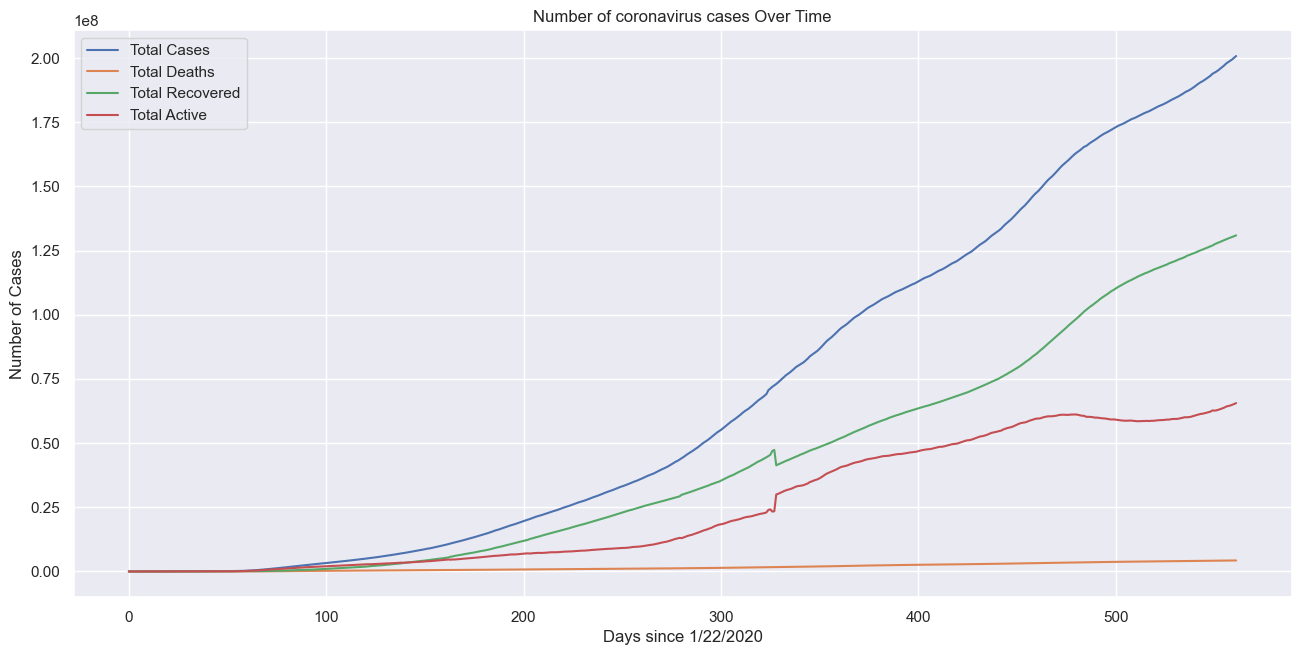

In [74]:
# plot the total of each category with line chart
total_df.plot(kind='line', figsize=(14, 7))
plt.xlabel("Days since 1/22/2020")
plt.ylabel("Number of Cases")
plt.title("Number of coronavirus cases Over Time")
plt.legend()

plt.show()


In [75]:
# transform all the number of cases in total_df using log10() method
total_log_df = total_df.copy()
columns_to_transform = ["Total Cases", "Total Deaths", "Total Recovered", "Total Active"]
print(total_log_df.head())

total_log_df[columns_to_transform] = np.log10(total_log_df[columns_to_transform])
print(total_log_df.head())


                      Total Cases  Total Deaths  Total Recovered  Total Active
Days since 1/22/2020                                                          
0                     6366.258024   6366.258024      7459.992508  -7459.992508
1                      557.000000     17.000000        30.000000    510.000000
2                      657.000000     18.000000        32.000000    607.000000
3                      944.000000     26.000000        39.000000    879.000000
4                     1437.000000     42.000000        42.000000   1353.000000
                      Total Cases  Total Deaths  Total Recovered  Total Active
Days since 1/22/2020                                                          
0                        3.803884      3.803884         3.872738           NaN
1                        2.745855      1.230449         1.477121      2.707570
2                        2.817565      1.255273         1.505150      2.783189
3                        2.974972      1.414973     

C:\Users\truon\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning:

invalid value encountered in log10



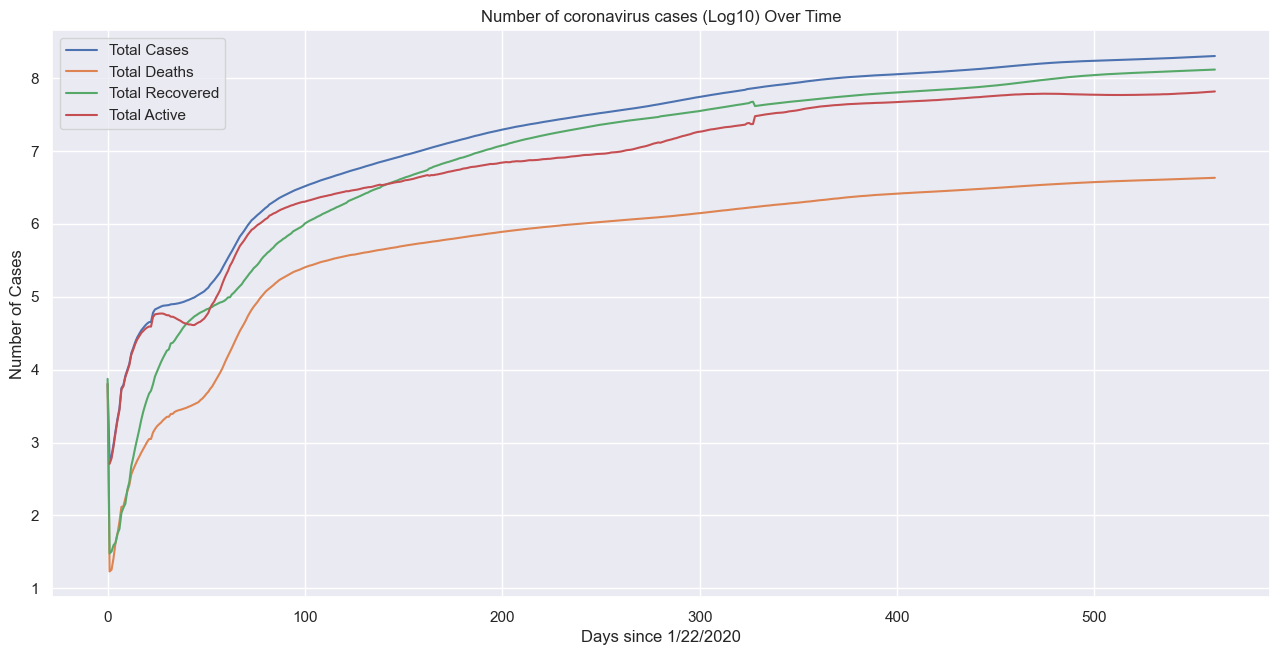

In [76]:
# plot the log10 dataframe
total_log_df.plot(kind='line', figsize=(14, 7))
plt.xlabel("Days since 1/22/2020")
plt.ylabel("Number of Cases")
plt.title("Number of coronavirus cases (Log10) Over Time")
plt.legend()

plt.show()

## Bài toán 3
    Trực quan hóa tổng số ca bệnh, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ được phân tách bằng cách sử dụng biểu đồ đường.

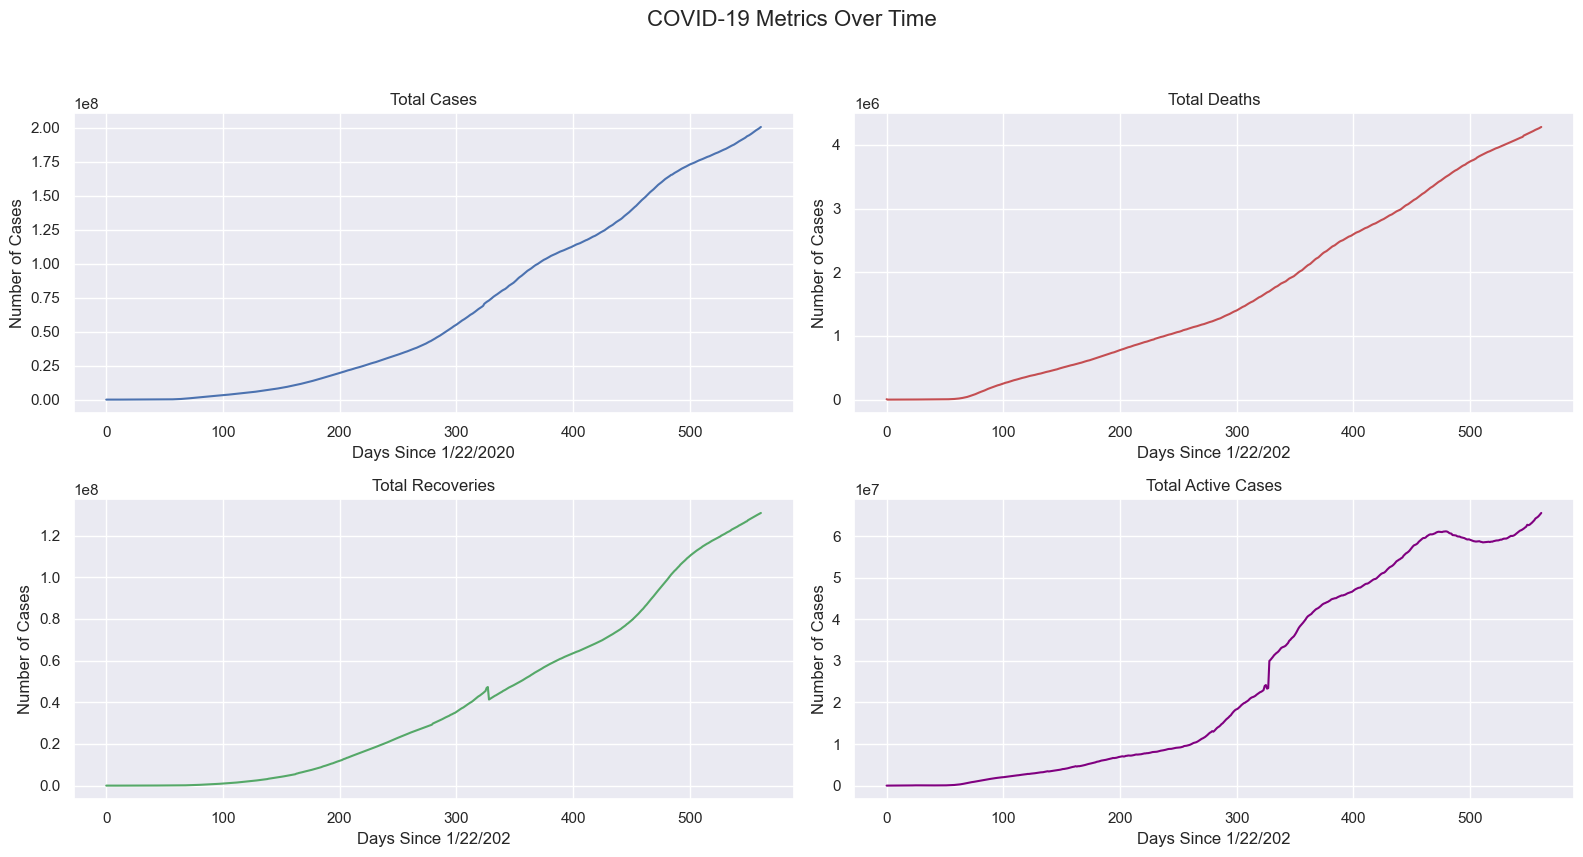

In [77]:
# Create subplots for each line graph
fig, axes = plt.subplots(2, 2, figsize=(16, 9))
fig.suptitle("COVID-19 Metrics Over Time", fontsize=16)

# Total Cases
axes[0, 0].plot(total_df.index, total_df["Total Cases"], color='b')
axes[0, 0].set_title("Total Cases")
axes[0, 0].set_xlabel("Days Since 1/22/2020")
axes[0, 0].set_ylabel("Number of Cases")

# Total Deaths
axes[0, 1].plot(total_df.index, total_df["Total Deaths"], color='r')
axes[0, 1].set_title("Total Deaths")
axes[0, 1].set_xlabel("Days Since 1/22/202")
axes[0, 1].set_ylabel("Number of Cases")

# Total Recoveries
axes[1, 0].plot(total_df.index, total_df["Total Recovered"], color='g')
axes[1, 0].set_title("Total Recoveries")
axes[1, 0].set_xlabel("Days Since 1/22/202")
axes[1, 0].set_ylabel("Number of Cases")

# Total Active Cases
axes[1, 1].plot(total_df.index, total_df["Total Active"], color='purple')
axes[1, 1].set_title("Total Active Cases")
axes[1, 1].set_xlabel("Days Since 1/22/202")
axes[1, 1].set_ylabel("Number of Cases")

# Adjust layout and display the subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Bài toán 4
    Tính toán số lượng gia tăng hàng ngày trong tổng số trường hợp, tổng số người chết, tổng số người hồi phục và tổng số đang điều trị theo thời gian (đơn vị ngày).

In [79]:
# calculate the daily increase
daily_increases = total_df.diff()
daily_increases

Total Cases  Total Deaths  Total Recovered  \
Days since 1/22/2020                                                 
0                               NaN           NaN              NaN   
1                      -5809.258024  -6349.258024     -7429.992508   
2                        100.000000      1.000000         2.000000   
3                        287.000000      8.000000         7.000000   
4                        493.000000     16.000000         3.000000   
...                             ...           ...              ...   
557                   517345.000000   8844.000000    303929.000000   
558                   483068.000000   7419.000000    289178.000000   
559                   571103.000000   8151.000000    283144.000000   
560                   634275.000000  10353.000000    304468.000000   
561                   680458.000000  10492.000000    317060.000000   

                       Total Active  
Days since 1/22/2020                 
0                               NaN  
1                       7969.992508  
2                         97.000000  
3                        272.000000  
4                        474.000000  
...                             ...  
557                   204572.000000  
558                   186471.000000  
559                   279808.000000  
560                   319454.000000  
561                   352906.000000  

[562 rows x 4 columns]

## Bài toán 5
    Trực quan hóa số lượng gia tăng hàng ngày về tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ riêng biệt bằng cách sử dụng biểu đồ cột.

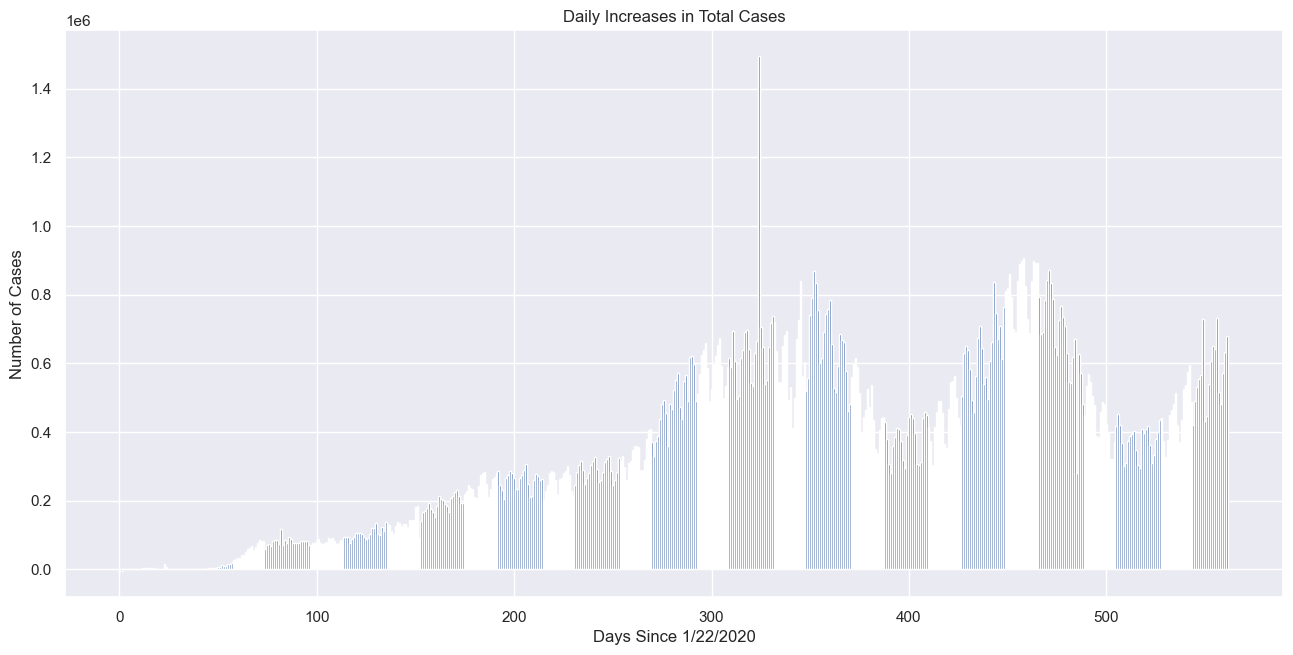

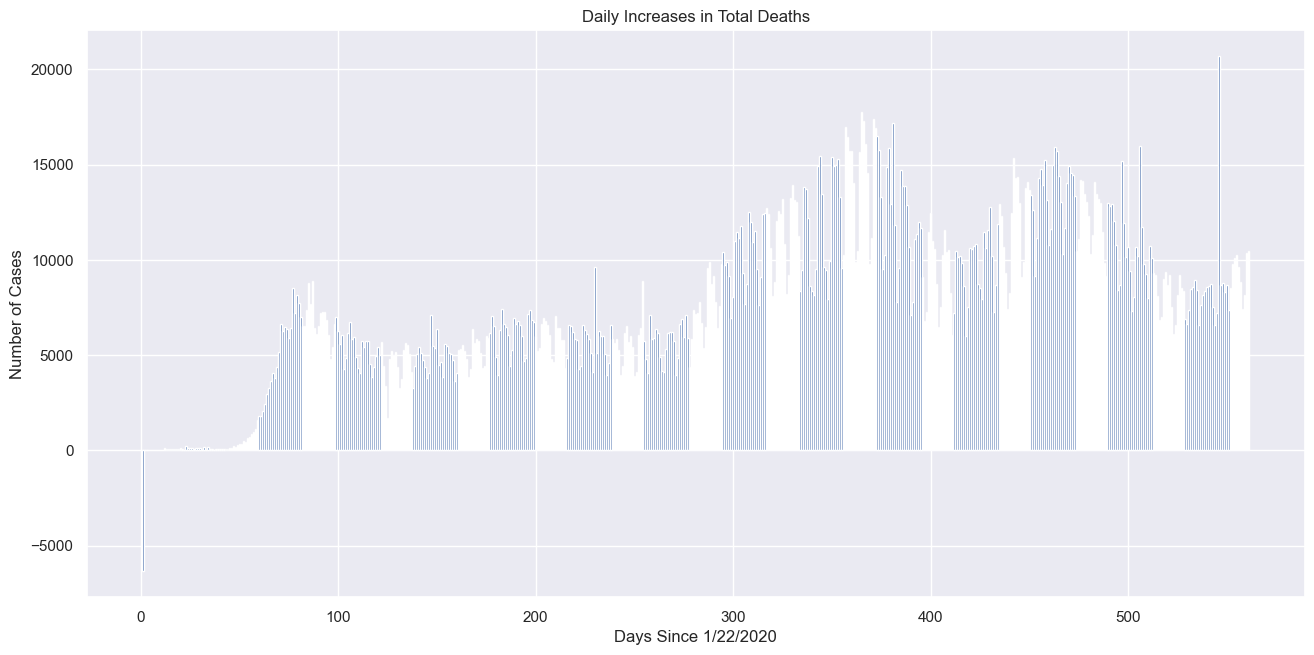

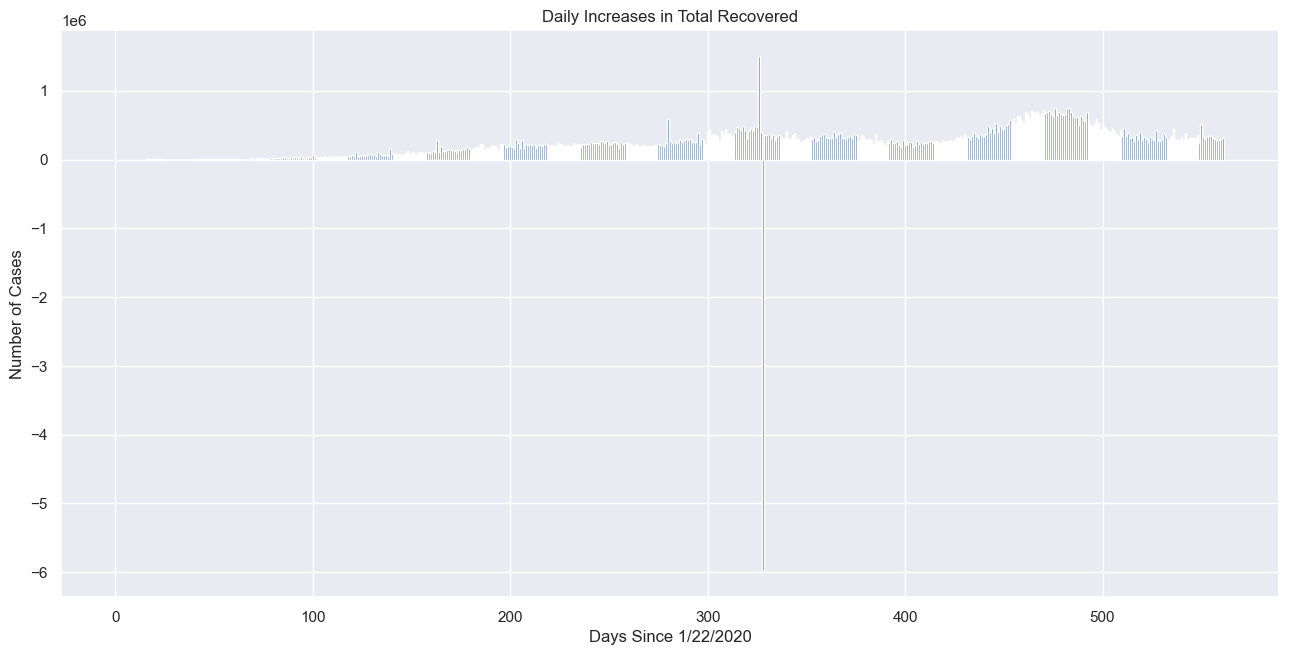

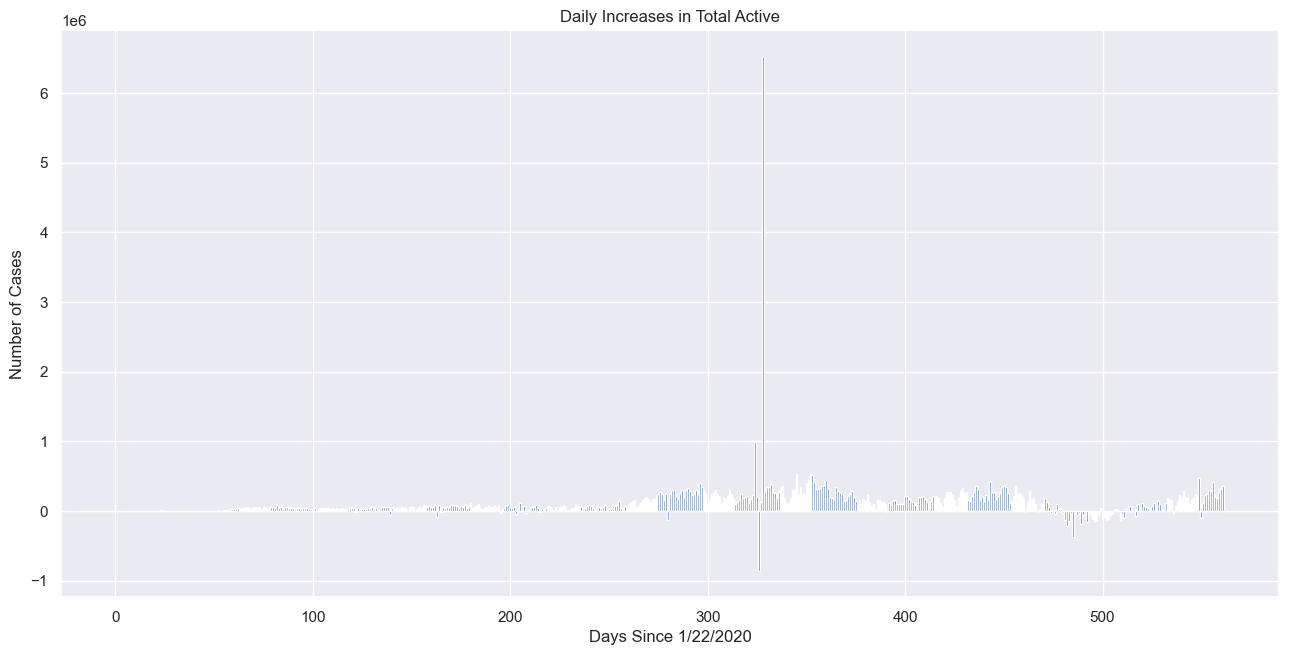

In [80]:
# Create separate bar charts for each daily increase
metrics = ["Total Cases", "Total Deaths", "Total Recovered", "Total Active"]

for metric in metrics:
    plt.figure(figsize=(14, 7))
    plt.bar(daily_increases.index, daily_increases[metric], color='b')
    plt.title(f"Daily Increases in {metric}")
    plt.xlabel("Days Since 1/22/2020")
    plt.ylabel("Number of Cases")
    plt.show()

# Bài toán 6:
    Tính tỷ lệ tử vong toàn cầu và tỷ lệ hồi phục theo phần trăm theo thời gian.

In [19]:
# calculate mortality and recovery rate by multiply each value wih 100
mortality_rate = [rate * 100 for rate in mortality_rate]
recovery_rate = [rate * 100 for rate in recovery_rate]

# Bài toán 7
**7.1**

    Trực quan hóa tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

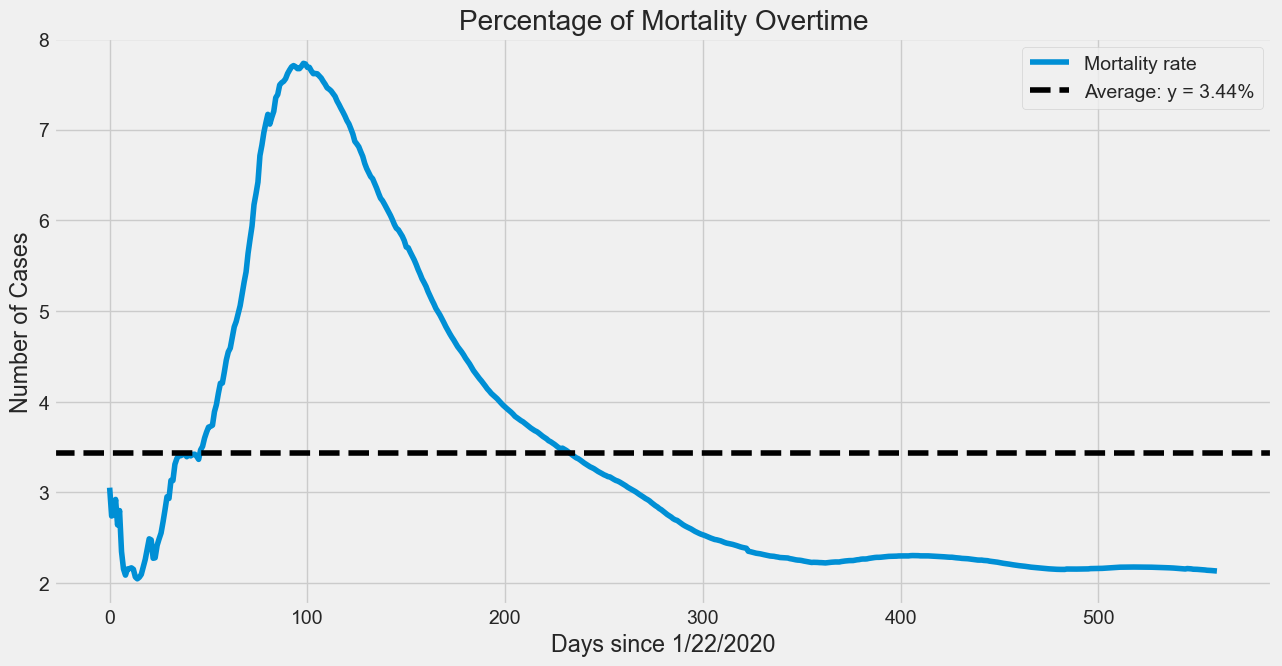

In [20]:
average_mortality_rate = np.mean(mortality_rate)
mortality_df = pd.DataFrame({'Mortality rate': mortality_rate})

mortality_df.plot(kind='line', figsize=(14, 7))
plt.axhline(y=average_mortality_rate, color='black', linestyle='--', label=f'Average: y = {average_mortality_rate:.2f}%')
plt.xlabel("Days since 1/22/2020")
plt.ylabel("Number of Cases")
plt.title("Percentage of Mortality Overtime")
plt.legend()

plt.show()

**7.2**

    Trực quan hóa tỷ lệ hồi phục theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

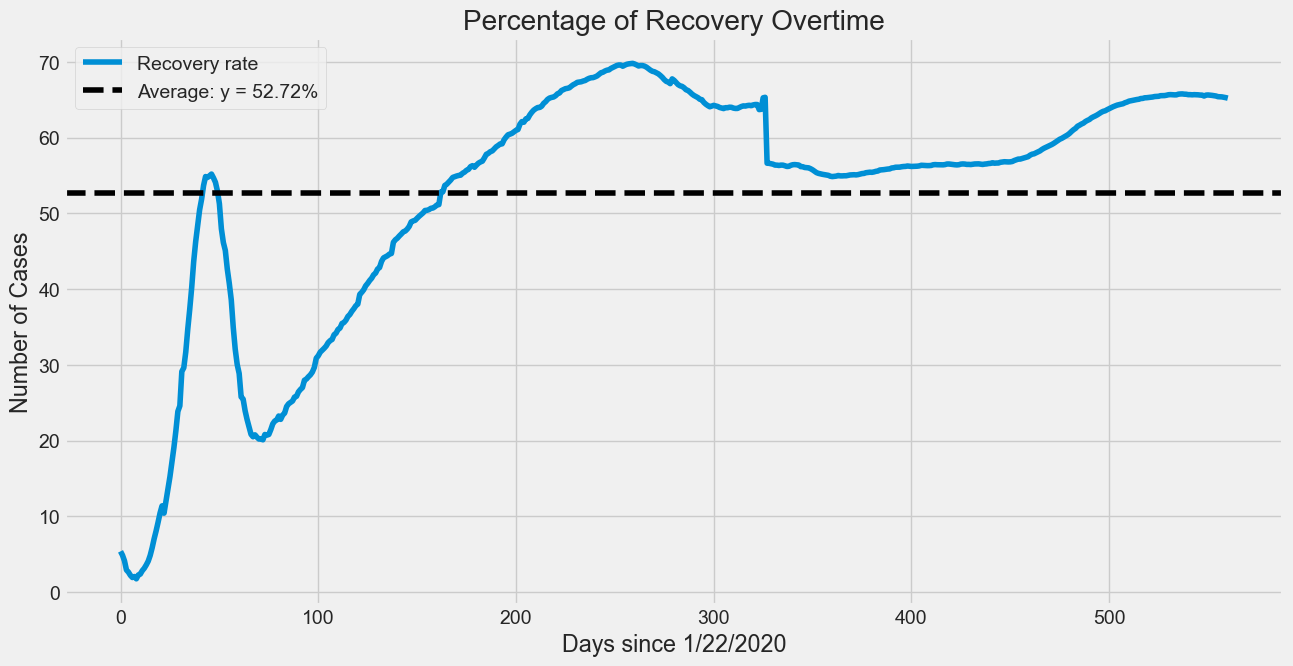

In [21]:
average_recovery_rate = np.mean(recovery_rate)
recovery_df = pd.DataFrame({'Recovery rate': recovery_rate})

recovery_df.plot(kind='line', figsize=(14, 7))
plt.axhline(y=average_recovery_rate, color='black', linestyle='--', label=f'Average: y = {average_recovery_rate:.2f}%')
plt.xlabel("Days since 1/22/2020")
plt.ylabel("Number of Cases")
plt.title("Percentage of Recovery Overtime")
plt.legend()

plt.show()

#  5. Phân tích theo lục địa

## Tiền xử lý dữ liệu

In [22]:
# Changing the country names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America',
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defining Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


In [23]:
# transform all data in list to the continent by name
continents_countries = [continents[country_to_continent_code(country)] for country in countries]
continents_countries1 = [continents[country_to_continent_code(country)] for country in countries1]
continents_countries2 = [continents[country_to_continent_code(country)] for country in countries2]

# Bài toán 8
    Thêm trường "continent" vào tập dữ liệu confirm_df, death_df và recorveries_df:

In [24]:
# add continent col to 3 dataframe
confirmed_df.insert(2, 'Continent', continents_countries)
deaths_df.insert(2, 'Continent', continents_countries1)
recoveries_df.insert(2, 'Continent', continents_countries2)

In [25]:
confirmed_df.head()

Province/State Country/Region Continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...   144285   145008   145552   
1        0        0        0        0  ...   132891   132922   132952   
2        0        0        0        0  ...   163660   165204   167131   
3        0        0        0        0  ...    14577    14586    14586   
4        0        0        0        0  ...    41879    42110    42288   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0   145996   146523   147154  147501  147985  148572  148933  
1   132999   133036   133081  133121  133146  133211  133310  
2   168668   170189   171392  172564  173922  175229  176724  
3    14655    14678    14678   14678   14747   14766   14797  
4    42486    42646    42777   42815   42970   43070   43158  

[5 rows x 566 columns]

In [26]:
deaths_df.head()

Province/State Country/Region Continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...     6477     6515     6577   
1        0        0        0        0  ...     2456     2456     2457   
2        0        0        0        0  ...     4087     4112     4161   
3        0        0        0        0  ...      127      127      127   
4        0        0        0        0  ...      991      994     1000   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0     6615     6677     6708    6737    6774    6804    6836  
1     2457     2457     2457    2457    2457    2457    2457  
2     4189     4219     4254    4291    4329    4370    4404  
3      127      128      128     128     128     128     128  
4     1003     1008     1011    1016    1018    1022    1026  

[5 rows x 566 columns]

In [27]:
recoveries_df.head()

Province/State Country/Region Continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...    82586    82586    82586   
1        0        0        0        0  ...   130152   130166   130174   
2        0        0        0        0  ...   111322   112050   112900   
3        0        0        0        0  ...    14077    14113    14113   
4        0        0        0        0  ...    35686    35742    35964   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0    82586    82586    82586   82586   82586   82586   82586  
1   130187   130205   130222  130243  130256  130291  130314  
2   113707   114531   115276  116009  116770  117557  118409  
3    14180    14210    14210   14210   14296   14348   14380  
4    36025    36708    37255   37397   38360   39389   39582  

[5 rows x 566 columns]

# Bài toán 9
    Tạo khung dữ liệu country_df với chỉ mục là trường "Country/Region".
    Các thông tin cột này sẽ là:
    - continent: Lục địa của quốc gia.
    - Confirmed: Tổng số ca dương tính.
    - Deaths: Tổng số người chết.
    - Recoveries: Tổng số ca hồi phục
    - Active: Tổng số đang điều trị.
    - Mortality Rate: Tỉ lệ tử vong tính theo phần trăm.

In [28]:
def calculate_total_by_country(df, new_column_name):
    grouped_df = df.groupby('Country/Region').sum()
    cols = grouped_df.keys()
    grouped_df[new_column_name] = grouped_df.loc[:, cols[-1]]
    return grouped_df[new_column_name]

In [29]:
total_confirmed_by_country = calculate_total_by_country(confirmed_df, 'Confirmed')
total_deaths_by_country = calculate_total_by_country(deaths_df, 'Deaths')
total_recoveries_by_country = calculate_total_by_country(recoveries_df, 'Recoveries')

In [30]:
merged_df = pd.merge(total_confirmed_by_country, total_deaths_by_country, on='Country/Region')
country_df = pd.merge(merged_df, total_recoveries_by_country, on='Country/Region')
country_df['Active'] = country_df['Confirmed'] - country_df['Deaths'] - country_df['Recoveries']
country_df['Mortality Rate'] = (country_df['Deaths']/country_df['Confirmed'])*100
country_df['Mortality Rate'] = country_df['Mortality Rate'].round(2)

countries = np.asarray(country_df.index)
continents_countries = [continents[country_to_continent_code(country)] for country in countries]
country_df.insert(0, 'Continent', continents_countries)

country_df.head(10)

Continent  Confirmed  Deaths  Recoveries  Active  \
Country/Region                                                              
Afghanistan                   Asia     148933    6836       82586   59511   
Albania                     Europe     133310    2457      130314     539   
Algeria                     Africa     176724    4404      118409   53911   
Andorra                     Europe      14797     128       14380     289   
Angola                      Africa      43158    1026       39582    2550   
Antarctica                  Others          0       0           0       0   
Antigua and Barbuda  North America       1311      43        1239      29   
Argentina            South America    4975616  106747     4615834  253035   
Armenia                       Asia     230993    4625      220438    5930   
Australia                Australia      35391     932       24203   10256   

                     Mortality Rate  
Country/Region                       
Afghanistan                    4.59  
Albania                        1.84  
Algeria                        2.49  
Andorra                        0.87  
Angola                         2.38  
Antarctica                      NaN  
Antigua and Barbuda            3.28  
Argentina                      2.15  
Armenia                        2.00  
Australia                      2.63

# Bài toán 10
    Tạo khung dữ liệu Continental_df với chỉ mục là trường "continent".
    Các thông tin cột này sẽ là:

     - Confirmed: Đất nước lục địa.
     - Deaths: Tổng số người chết.
     - Recoveries: Tổng số lần khôi phục.
     - Active: Tổng số đang điều trị.
     - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [31]:
def calculate_total_by_continent(df, new_column_name):
    grouped_df = df.groupby('Continent').sum()
    cols = grouped_df.keys()
    grouped_df[new_column_name] = grouped_df.loc[:, cols[-1]]
    return grouped_df[new_column_name]

In [32]:
total_confirmed_by_continent = calculate_total_by_continent(confirmed_df, 'Confirmed')
total_deaths_by_continent = calculate_total_by_continent(deaths_df, 'Deaths')
total_recoveries_by_continent = calculate_total_by_continent(recoveries_df, 'Recoveries')

In [33]:
merged_df = pd.merge(total_confirmed_by_continent, total_deaths_by_continent, on='Continent')
continental_df = pd.merge(merged_df, total_recoveries_by_continent, on='Continent')
continental_df['Active'] = continental_df['Confirmed'] - continental_df['Deaths'] - continental_df['Recoveries']
continental_df['Mortality Rate'] = (continental_df['Deaths']/continental_df['Confirmed'])*100
continental_df['Mortality Rate'] = continental_df['Mortality Rate'].round(2)
continental_df.head(10)

Confirmed   Deaths  Recoveries    Active  Mortality Rate
Continent                                                              
Africa           6855602   174000     5955131    726471            2.54
Asia            62536726   902952    57853343   3780431            1.44
Australia          90000     1425       55290     33285            1.58
Europe          52448545  1167140    27947075  23334330            2.23
North America   42351963   924518     5776939  35650506            2.18
Others            753558    16614      654615     82329            2.20
South America   35722194  1096367    32656668   1969159            3.07

## Biểu đồ đường mẫu
Dưới đây là các hàm mẫu để trực quan hóa các trường hợp sinh động theo thời gian ở mỗi châu lục / quốc gia:

In [34]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')

    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})

    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)

def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)

    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["Continent",continent]
    elif country != None:
        params = ["Country/Region",country]
    else:
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]

    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"

    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]

    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)

    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})

    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)

    if figure == None:
        plt.show()



# Bài toán 11
**11.1**

  Áp dụng hàm visual_covid_case để hiển thị trực quan hóa về Covid của 7 lục địa trong 7 biểu đồ đường được riêng biệt. Thứ tự hiển thị được sắp xếp theo thứ tự giảm dần theo số ca được xác nhận.
    

In [35]:
sorted_continents = total_confirmed_by_continent.sort_values(ascending=False).index.tolist()

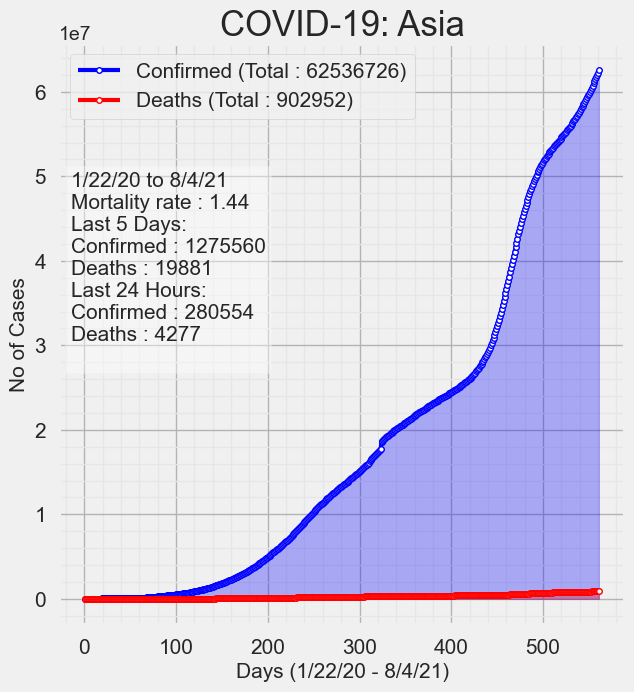

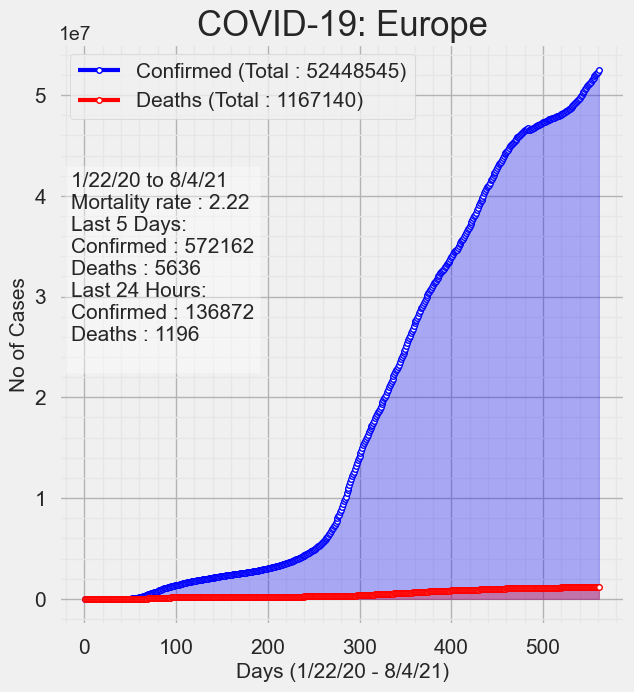

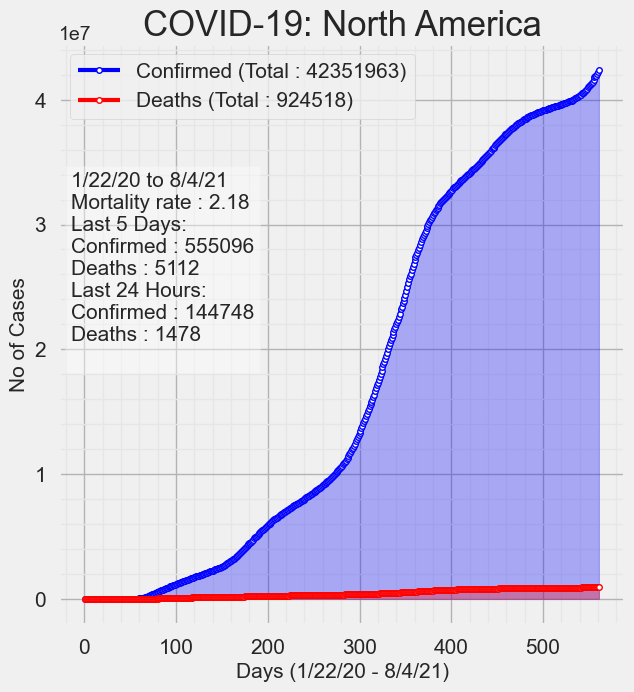

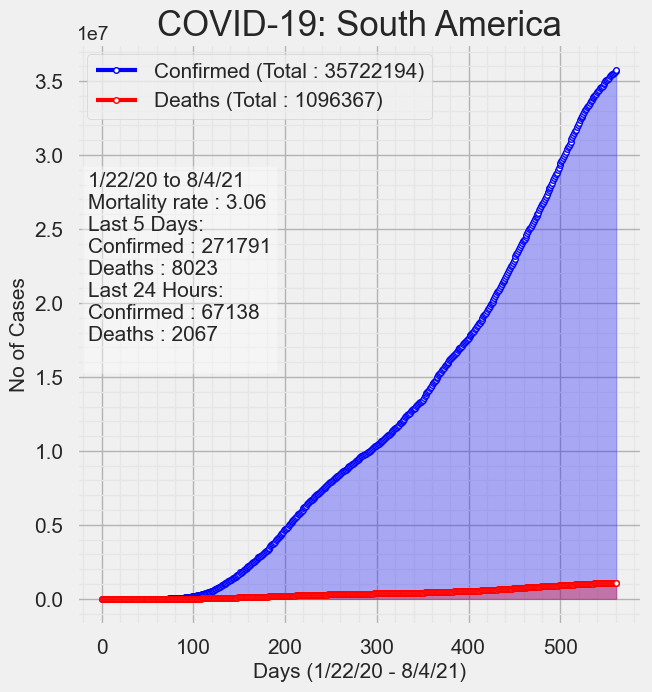

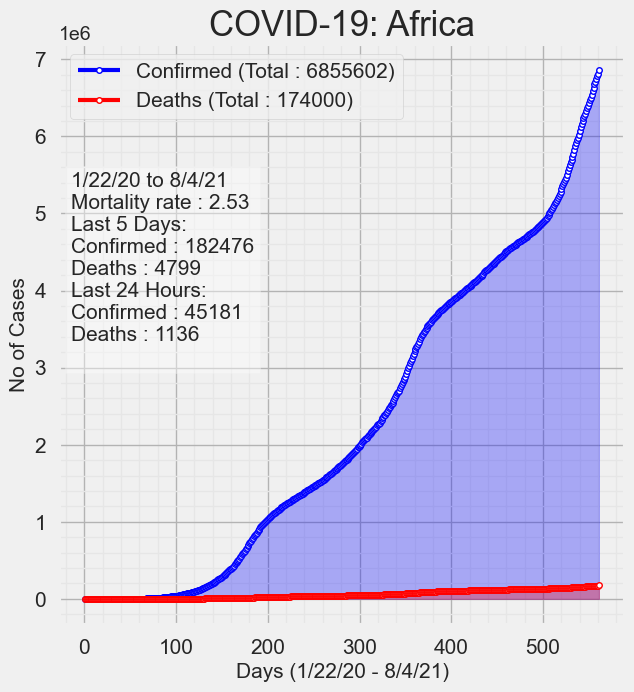

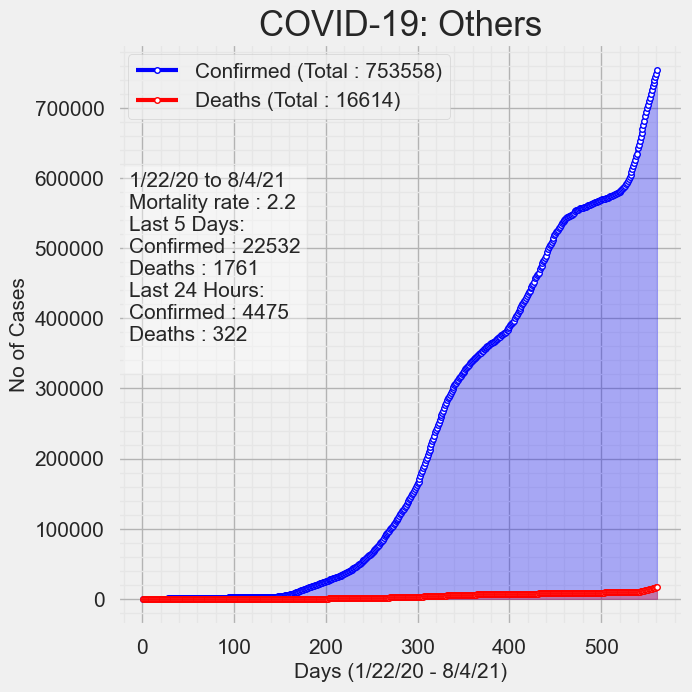

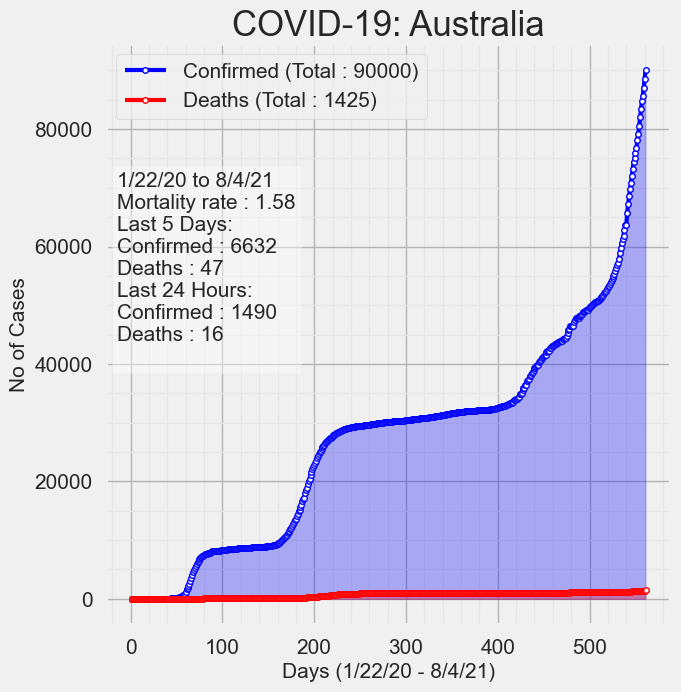

[None, None, None, None, None, None, None]

In [36]:
[visualize_covid_cases(confirmed_df, deaths_df, continent=continent) for continent in sorted_continents]


**11.2**

    Sửa đổi "plot_params" và hàm "visualize_covid_cases" để:
    - Hiển thị kết quả của 7 ngày gần nhất thay vì 5 ngày.
    - Thêm "Recoveries line" vào biểu đồ chính.
    - Thêm số "Total Recoveries" vào bảng nhỏ.
    - Thêm "Recoveries" được nộp trong 7 ngày và 24 giờ qua vào menu thông tin.

In [37]:
def plot_params_new(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')

    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})

    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)

def visualize_covid_cases_new(confirmed, deaths, recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)

    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths", "Recoveries"]
    if continent != None:
        params = ["Continent",continent]
    elif country != None:
        params = ["Country/Region",country]
    else:
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]

    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"

    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]

    # Plot Parameters
    plot_params_new(ax,axis_label,scale = scale)

    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})

    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)

    if figure == None:
        plt.show()



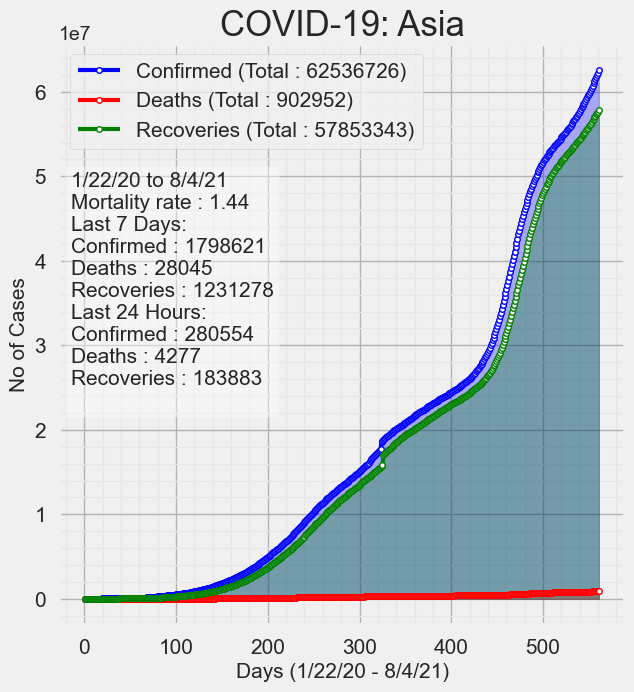

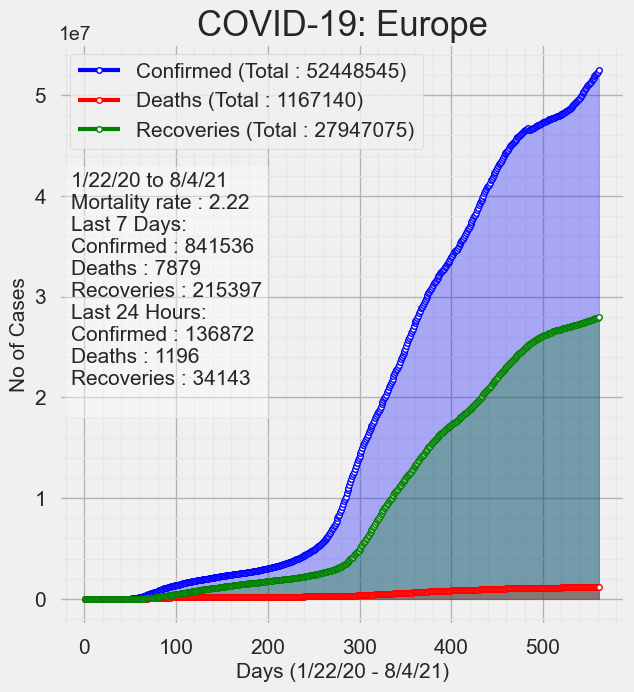

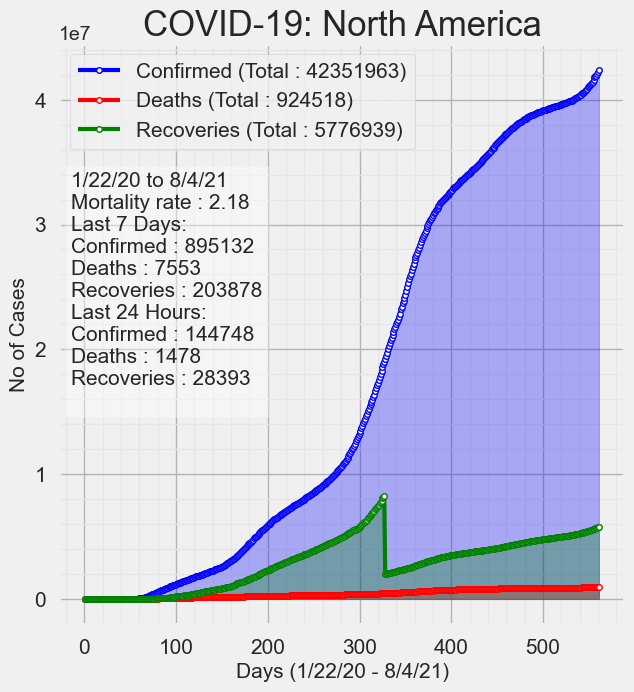

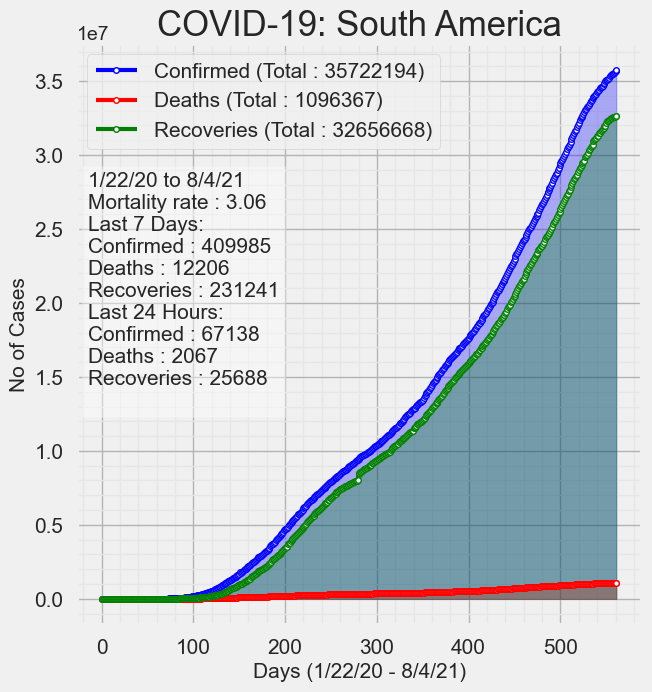

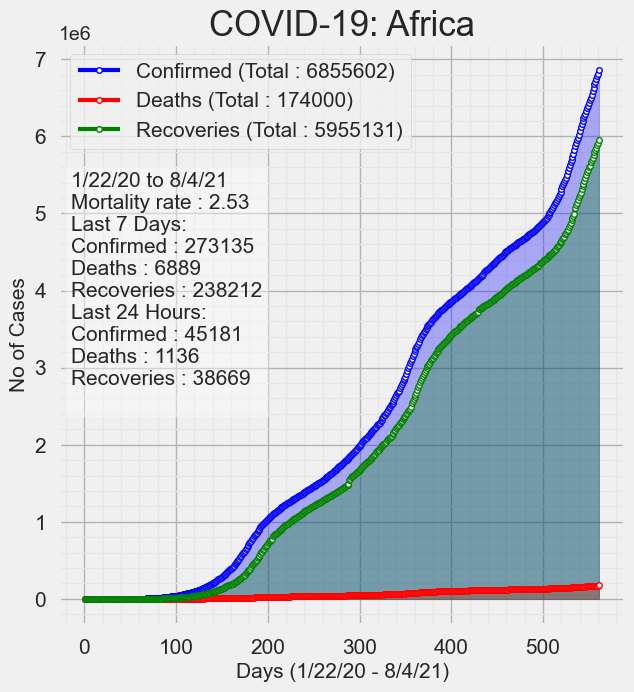

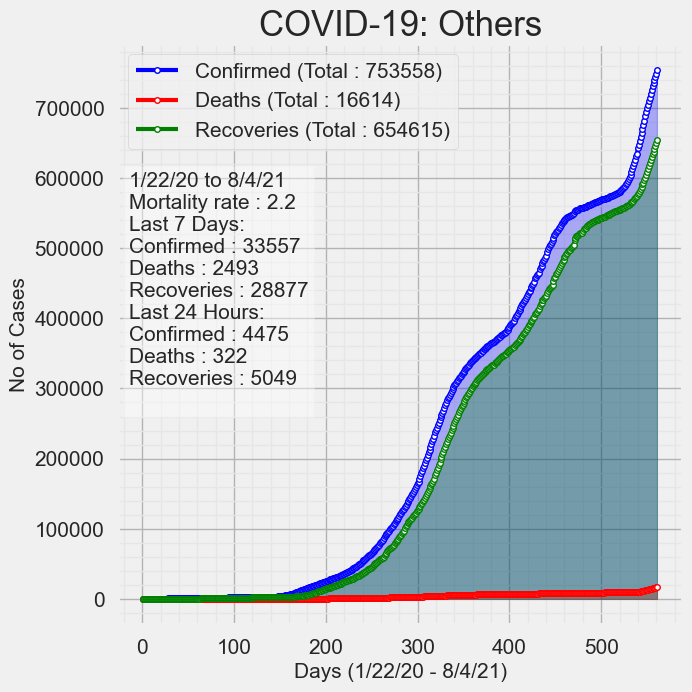

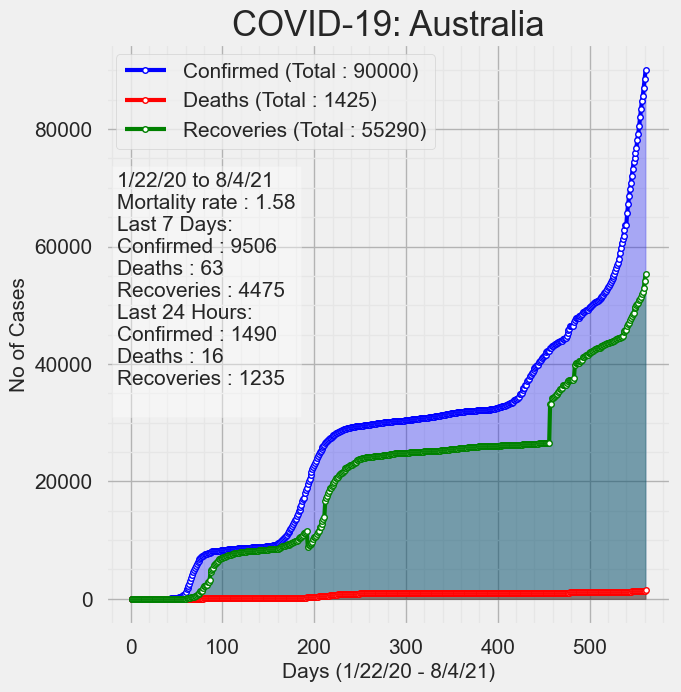

[None, None, None, None, None, None, None]

In [38]:
[visualize_covid_cases_new(confirmed_df, deaths_df, recoveries_df, continent=continent) for continent in sorted_continents]

# Bài toán 12
    Trực quan hóa ma trận tương quan của continents_df.

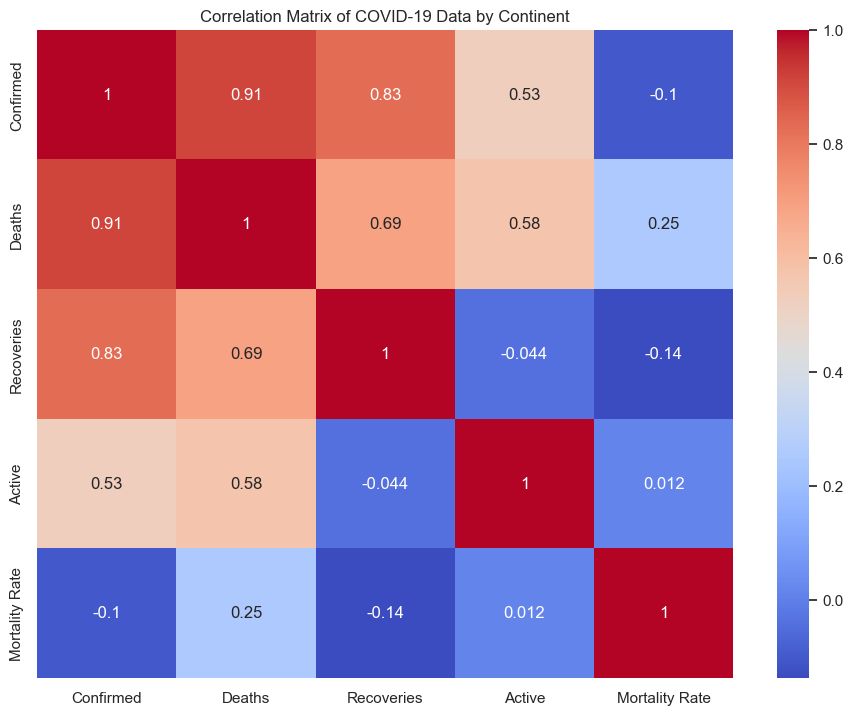

In [39]:
# calculate the correlation matrix
correlation_matrix = continental_df.corr()

# Plot the correlation matrix using a heatmap
sns.set_theme()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of COVID-19 Data by Continent')
plt.show()

# Bài toán 13
    Xây dựng biểu đồ hình tròn để so sánh tỷ lệ số ca dương tính, số người chết, số người khỏi bệnh và đang điều trị của 7 lục địa.
    Mỗi trường (xác nhận, tử vong, ...) nên được trình bày trong các biểu đồ hình tròn khác nhau.
    Bạn không được phép sử dụng đoạn mã lặp lại ở đây, hãy thử sử dụng vòng lặp for.
    Mỗi lục địa nên được trình bày bằng các màu sắc khác nhau.

In [40]:
continental_df

Confirmed   Deaths  Recoveries    Active  Mortality Rate
Continent                                                              
Africa           6855602   174000     5955131    726471            2.54
Asia            62536726   902952    57853343   3780431            1.44
Australia          90000     1425       55290     33285            1.58
Europe          52448545  1167140    27947075  23334330            2.23
North America   42351963   924518     5776939  35650506            2.18
Others            753558    16614      654615     82329            2.20
South America   35722194  1096367    32656668   1969159            3.07

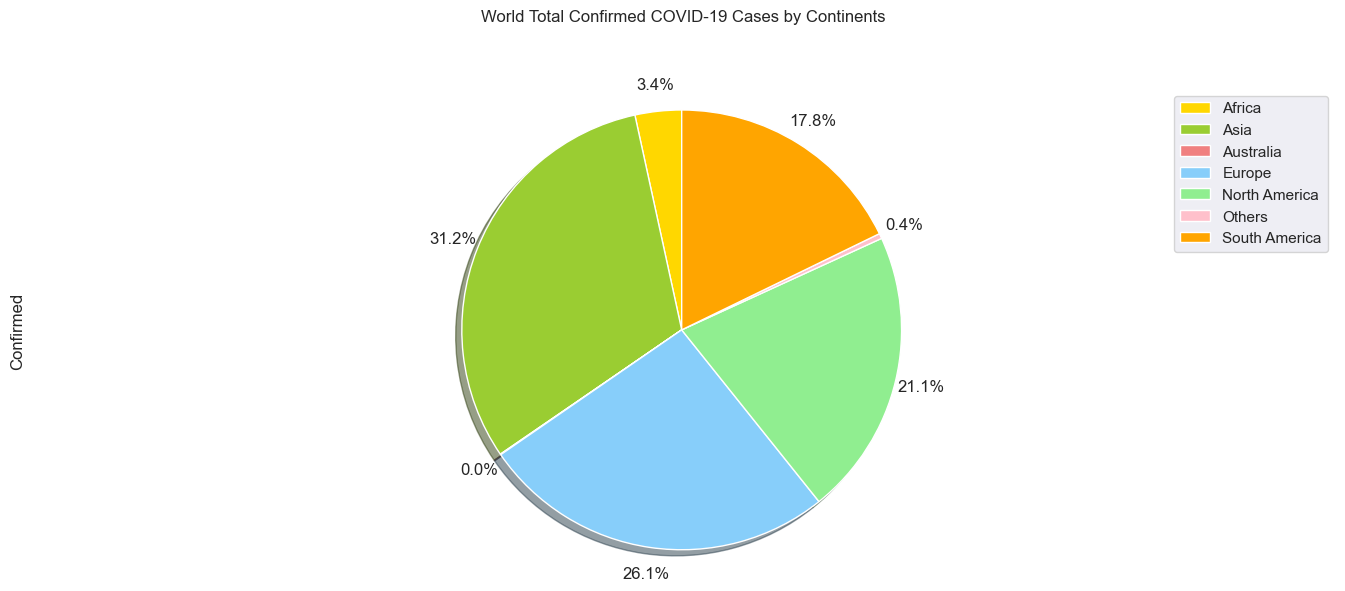

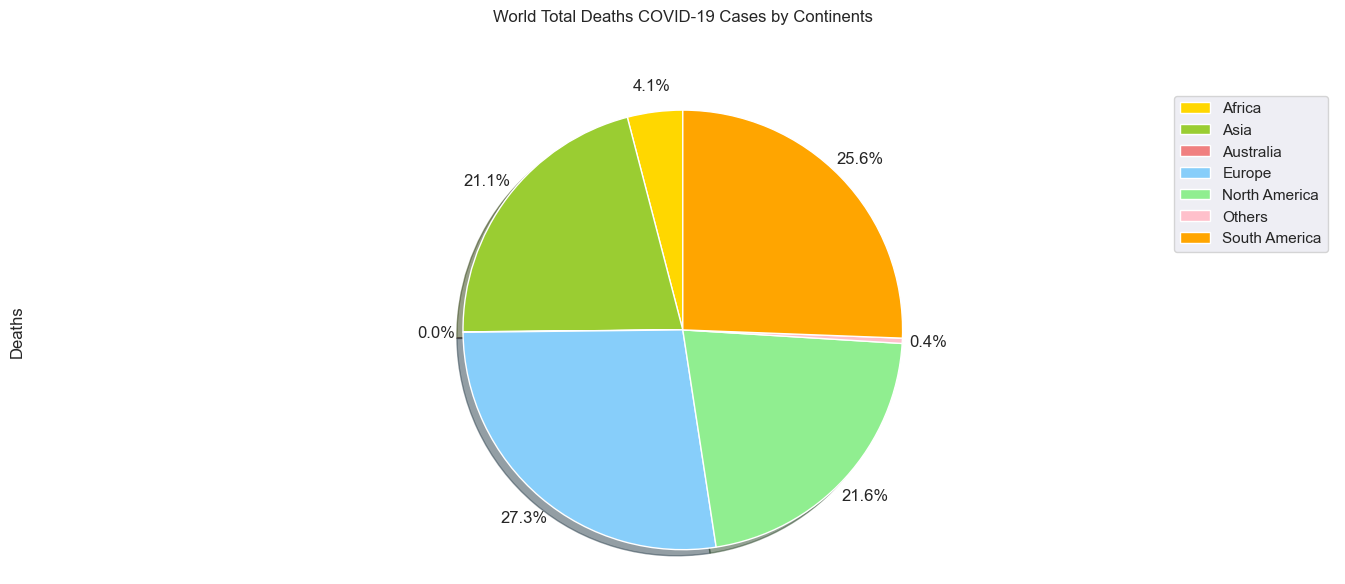

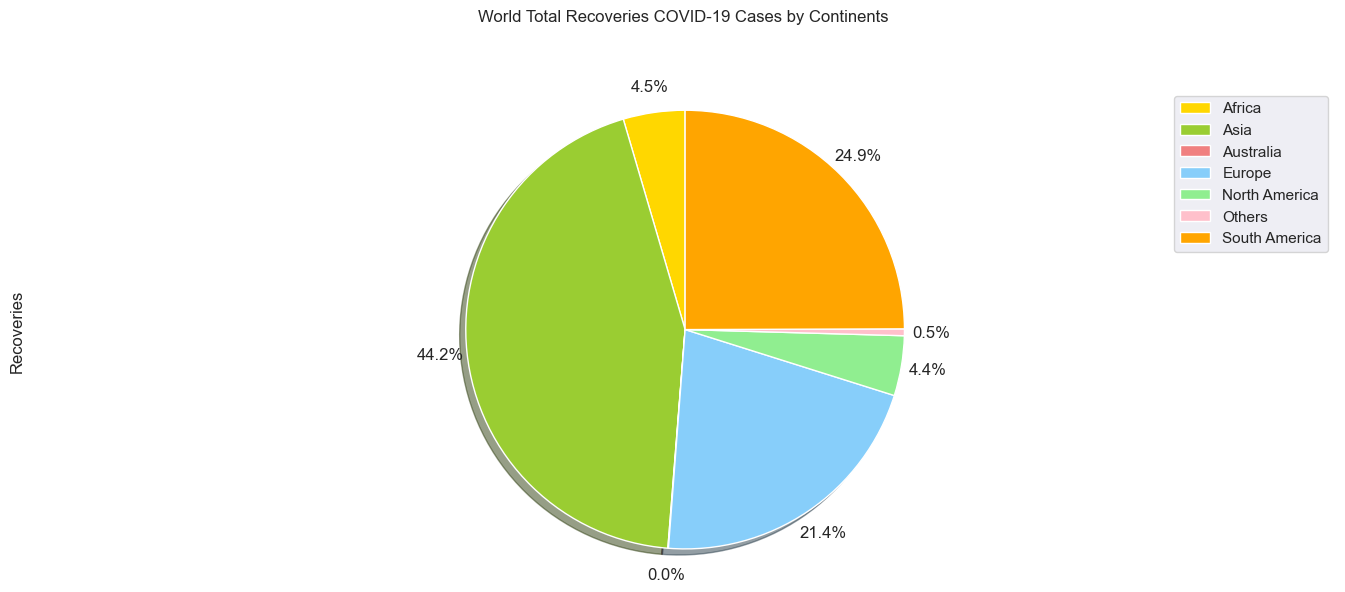

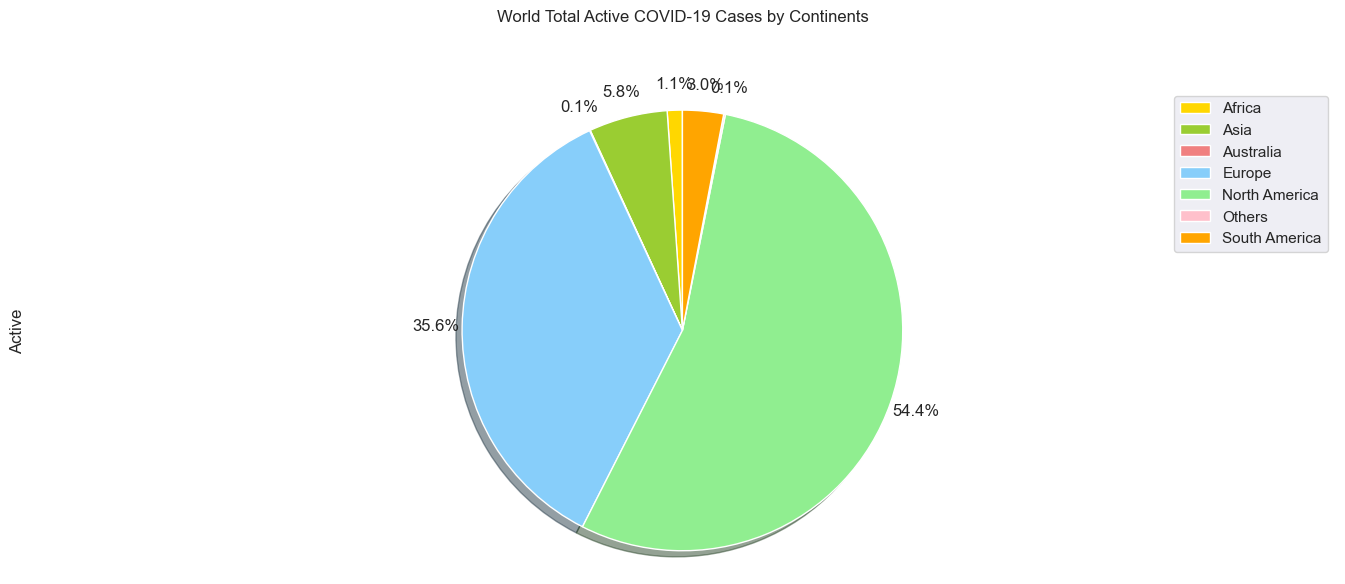

In [41]:
for col in continental_df.columns.tolist()[:-1]:
    colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'orange']
    
    continental_df[col].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            )
    
    # scale the title up by 12% to match pctdistance
    plt.title(f'World Total {col} COVID-19 Cases by Continents', y=1.12)
    
    plt.axis('equal')
    
    # add legend
    plt.legend(labels=continental_df.index, loc='upper right')
    plt.show()

# 6. Phân tích theo quốc gia

# Bài toán 14
    Xây dựng bản đồ folium để hiển thị số người được xác nhận, tử vong, phục hồi và tỷ lệ tử vong của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của hình tròn tỷ lệ thuận với số lượng xác nhận.

In [42]:
country_df[['Lat', 'Long']] = confirmed_df.groupby("Country/Region").mean()[['Lat', 'Long']]

In [43]:
countrywise_df = country_df.copy()
countrywise_df.reset_index(inplace=True)

In [44]:
# Initialize the Folium map
m = folium.Map(location=[0, 0], zoom_start=2)

# Add circle for each country
for idx, row in countrywise_df.iterrows():
    folium.Circle(
        location=(row['Lat'], row['Long']),
        radius=int(row['Confirmed'])/20,  # Adjust as needed
        color="orange",
        fill=True,
        fill_color="red",
        popup=f"{row['Country/Region']}: Confirmed={row['Confirmed']}, Deaths={row['Deaths']}, Recoveries={row['Recoveries']}, Mortality Rate={row['Mortality Rate']:.2f}%"
    ).add_to(m)

# Show the map
m


# Bài toán 15
Xây dựng một bản đồ px [(plotly.express)](https://plotly.com/python/plotly-express/) để hiển thị số lượng hoạt động của mỗi quốc gia trong log(10) dựa trên tên của các quốc gia bằng cách sử dụng màu "spectral" (quang phổ).

In [45]:
country_df

Continent  Confirmed  Deaths  Recoveries  Active  \
Country/Region                                                          
Afghanistan               Asia     148933    6836       82586   59511   
Albania                 Europe     133310    2457      130314     539   
Algeria                 Africa     176724    4404      118409   53911   
Andorra                 Europe      14797     128       14380     289   
Angola                  Africa      43158    1026       39582    2550   
...                        ...        ...     ...         ...     ...   
West Bank and Gaza      Others     317404    3609      312320    1475   
Winter Olympics 2022    Others          0       0           0       0   
Yemen                     Asia       7096    1380        4251    1465   
Zambia                  Africa     197791    3430      189658    4703   
Zimbabwe                Africa     113526    3711       82994   26821   

                      Mortality Rate        Lat        Long  
Country/Region                                               
Afghanistan                     4.59  33.939110   67.709953  
Albania                         1.84  41.153300   20.168300  
Algeria                         2.49  28.033900    1.659600  
Andorra                         0.87  42.506300    1.521800  
Angola                          2.38 -11.202700   17.873900  
...                              ...        ...         ...  
West Bank and Gaza              1.14  31.952200   35.233200  
Winter Olympics 2022             NaN  39.904200  116.407400  
Yemen                          19.45  15.552727   48.516388  
Zambia                          1.73 -13.133897   27.849332  
Zimbabwe                        3.27 -19.015438   29.154857  

[201 rows x 8 columns]

In [46]:
# copy to the new DF
country_df_plotly = country_df.copy()
country_df_plotly.reset_index(inplace=True)

# Add a new column to the dataframe to store log10(Active Cases)
country_df_plotly['Log_Active'] = np.log10(country_df_plotly['Active'] + 1)  # Adding 1 to avoid log(0)

# Create the Plotly Express map
fig = px.choropleth(country_df_plotly,
                    locations='Country/Region',
                    color='Log_Active',  # Log of Active Cases
                    locationmode='country names',  # The mode to locate countries. Use 'country names' for this example.
                    color_continuous_scale='viridis',  # Color scale
                    labels={'Log_Active': 'Log of Active Cases'},
                    title='Logarithm (Base 10) of Active COVID-19 Cases by Country',
                    width=1200,
                    height=700
                    )

fig.show()

C:\Users\truon\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

invalid value encountered in log10



# Bài toán 16
    Lọc 10 quốc gia hàng đầu dựa trên số ca dương tính.

In [47]:
sorted_by_confirmed = country_df.sort_values('Confirmed', ascending=False)
sorted_by_confirmed_top_10 = sorted_by_confirmed.head(10)
sorted_by_confirmed_top_10

Continent  Confirmed  Deaths  Recoveries    Active  \
Country/Region                                                           
USA             North America   35460776  611222           0  34849554   
India                    Asia   31812114  426290    30974748    411076   
Brazil          South America   20034407  559944    17771228   1703235   
Russia                 Europe    6274006  159032     5609682    505292   
France                 Europe    6272466  112245      415111   5745110   
United Kingdom         Europe    5980830  157209       24693   5798928   
Turkey                   Asia    5822487   51767     5478185    292535   
Argentina       South America    4975616  106747     4615834    253035   
Colombia        South America    4815063  121695     4615354     78014   
Spain                  Europe    4545184   81844      150376   4312964   

                Mortality Rate        Lat        Long  
Country/Region                                         
USA                       1.72  40.000000 -100.000000  
India                     1.34  20.593684   78.962880  
Brazil                    2.79 -14.235000  -51.925300  
Russia                    2.53  61.524010  105.318756  
France                    1.79   6.425300   -9.839634  
United Kingdom            2.63  22.424560  -42.022004  
Turkey                    0.89  38.963700   35.243300  
Argentina                 2.15 -38.416100  -63.616700  
Colombia                  2.53   4.570900  -74.297300  
Spain                     1.80  40.463667   -3.749220

# Bài toán 17
    Trực quan hóa 10 quốc gia hàng đầu đã được xác nhận với số ca đang điều trị, khỏi bệnh và tử vong bằng cách sử dụng biểu đồ cột chồng.

In [48]:
# Data
countries = sorted_by_confirmed_top_10.index.tolist()
deaths = sorted_by_confirmed_top_10['Deaths'].tolist()
recoveries = sorted_by_confirmed_top_10['Recoveries'].tolist()
active = sorted_by_confirmed_top_10['Active'].tolist()

# Initialize figure
fig = go.Figure()

# Trace for Deaths
fig.add_trace(go.Bar(
    x=countries,
    y=deaths,
    name='Deaths',
    marker_color='#EF553B'
))

# Trace for Recoveries
fig.add_trace(go.Bar(
    x=countries,
    y=recoveries,
    name='Recoveries',
    marker_color='#00CC96'
))

# Trace for Active Cases
fig.add_trace(go.Bar(
    x=countries,
    y=active,
    name='Active Cases',
    marker_color='#636EFA'
))

# Layout
fig.update_layout(
    title='Top 10 Countries by Confirmed COVID-19 Cases',
    xaxis=dict(title='Country'),
    yaxis=dict(title='Number of Cases'),
    barmode='stack'  # This parameter creates the stacked bar chart
)

# Show figure
fig.show()

# 7. Phân tích nâng cao


# Bài toán 18
    Dựa trên dữ liệu trực quan trên toàn cầu, dịch COVID 2019 trên thế giới đã đạt đến đỉnh điểm chưa?
    Đặt câu trả lời của bạn ở đây:
     

**Câu trả lời:** 

Để trả lời cho câu hỏi trên ta cần dựa vào biểu đồ đường ở phần Phân tích toàn cầu:
- Dịch COVID-19 chưa đạt đỉnh, biểu đồ đường cho thấy số lượng ca nhiễm mới vẫn có xu hướng tăng trong tương lai.
- Tuy nhiên nhìn vào biểu đồ đường log10 thì có thể thấy rằng tỷ lệ tăng đã không còn mạnh nữa.
- Tất cả các chỉ số ca nhiễm mới, ca tử vong, ca phục hồi dần đi vào ổn định - tức là gần về một tỷ lệ nhất định, do hệ thống y tế đã không còn quá tải so với giai đoạn đầu và tỷ lệ phủ vắc-xin trên toàn cầu đã tăng.
 - Nhận định này còn ảnh hưởng nhiều bởi những yếu tố khách quan khác, ví dụ như khi xuất hiện biến chủng virus mới có độc tính cao hơn thì tỷ lệ ca mắc mới và tử vong có thể tăng đột biến trở lại 

# Bài toán 19:
Dựa trên hình ảnh dữ liệu trên phần lục địa:

    19.1 Châu lục nào có tỷ lệ tử vong cao nhất so với các trường hợp dương tính của các châu lục?

    19.2 Châu lục nào có tỷ lệ lây lan COVID 2019 cao nhất so với các trường hợp dương tính của các châu lục?
    
    19.3 Châu lục nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các lục địa?

(Lưu ý: Tỷ lệ chênh lệch COVID 2019 = Số lượng ca mới được xác nhận trong 10 ngày qua / số ca dương tính trước đó).
Đặt câu trả lời của bạn ở đây:


#### Trước khi đi tới kết luận cho các phần 19.1, 19.2 và 19.3 thì ta cần thực hiện một vài phân tích như bên dưới

In [49]:
continental_df[continental_df['Mortality Rate'] == continental_df['Mortality Rate'].max()] # show the max mortality rate

Confirmed   Deaths  Recoveries   Active  Mortality Rate
Continent                                                             
South America   35722194  1096367    32656668  1969159            3.07

In [50]:
continental_df['Recovery Rate'] = (continental_df['Recoveries']/continental_df['Confirmed'])*100

In [51]:
continental_df['Recovery Rate'] = continental_df['Recovery Rate'].round(2)

In [52]:
continental_df[continental_df['Recovery Rate'] == continental_df['Recovery Rate'].max()] # show the max recovery rate

Confirmed  Deaths  Recoveries   Active  Mortality Rate  \
Continent                                                           
Asia        62536726  902952    57853343  3780431            1.44   

           Recovery Rate  
Continent                 
Asia               92.51

In [53]:
confirmed_by_continent = confirmed_df.groupby('Continent').sum()
confirmed_by_continent

Lat         Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Continent                                                                     
Africa          149.604534   936.556463        0        0        0        0   
Asia           2214.514744  6866.135308      556      654      937     1429   
Australia      -410.961293  1910.082750        0        0        0        0   
Europe         2603.796046  -394.917050        0        0        2        3   
North America  1080.703680 -2874.983883        1        3        5        5   
Others          173.443019   697.311316        0        0        0        0   
South America  -151.828484  -773.926880        0        0        0        0   

               1/26/20  1/27/20  1/28/20  1/29/20  ...   7/26/21   7/27/21  \
Continent                                          ...                       
Africa               0        0        0        0  ...   6502401   6533843   
Asia              2105     2912     5558     6143  ...  60205047  60468774   
Australia            4        5        5        6  ...     78225     79166   
Europe               3        4        8       10  ...  51346015  51472513   
North America        8        8        9       10  ...  41244055  41345112   
Others               0        0        0        0  ...    709513    714653   
South America        0        0        0        0  ...  35155447  35232972   

                7/28/21   7/29/21   7/30/21   7/31/21    8/1/21    8/2/21  \
Continent                                                                   
Africa          6582467   6630103   6673126   6709341   6743551   6777717   
Asia           60738105  61008239  61261166  61499178  61753110  61976478   
Australia         80494     81984     83368     84789     85654     87035   
Europe         51607009  51744216  51876383  51972383  52057096  52194827   
North America  41456831  41566586  41796867  41874996  41940107  42069568   
Others           720001    725640    731026    736180    739969    743961   
South America  35312209  35383217  35450403  35512817  35553265  35594269   

                 8/3/21    8/4/21  
Continent                          
Africa          6810421   6855602  
Asia           62256172  62536726  
Australia         88510     90000  
Europe         52311673  52448545  
North America  42207215  42351963  
Others           749083    753558  
South America  35655056  35722194  

[7 rows x 563 columns]

In [54]:
# calculate the spread rate by continent
cols = confirmed_by_continent.keys()
confirmed_by_continent['Spread Rate'] = ((confirmed_by_continent[cols[-1]] - confirmed_by_continent[cols[-10]]) /confirmed_by_continent[cols[-11]])*100
confirmed_by_continent['Spread Rate'] = confirmed_by_continent['Spread Rate'].round(2)
confirmed_by_continent

Lat         Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Continent                                                                     
Africa          149.604534   936.556463        0        0        0        0   
Asia           2214.514744  6866.135308      556      654      937     1429   
Australia      -410.961293  1910.082750        0        0        0        0   
Europe         2603.796046  -394.917050        0        0        2        3   
North America  1080.703680 -2874.983883        1        3        5        5   
Others          173.443019   697.311316        0        0        0        0   
South America  -151.828484  -773.926880        0        0        0        0   

               1/26/20  1/27/20  1/28/20  1/29/20  ...   7/27/21   7/28/21  \
Continent                                          ...                       
Africa               0        0        0        0  ...   6533843   6582467   
Asia              2105     2912     5558     6143  ...  60468774  60738105   
Australia            4        5        5        6  ...     79166     80494   
Europe               3        4        8       10  ...  51472513  51607009   
North America        8        8        9       10  ...  41345112  41456831   
Others               0        0        0        0  ...    714653    720001   
South America        0        0        0        0  ...  35232972  35312209   

                7/29/21   7/30/21   7/31/21    8/1/21    8/2/21    8/3/21  \
Continent                                                                   
Africa          6630103   6673126   6709341   6743551   6777717   6810421   
Asia           61008239  61261166  61499178  61753110  61976478  62256172   
Australia         81984     83368     84789     85654     87035     88510   
Europe         51744216  51876383  51972383  52057096  52194827  52311673   
North America  41566586  41796867  41874996  41940107  42069568  42207215   
Others           725640    731026    736180    739969    743961    749083   
South America  35383217  35450403  35512817  35553265  35594269  35655056   

                 8/4/21  Spread Rate  
Continent                             
Africa          6855602         5.46  
Asia           62536726         3.89  
Australia         90000        15.34  
Europe         52448545         2.15  
North America  42351963         2.69  
Others           753558         6.25  
South America  35722194         1.61  

[7 rows x 564 columns]

In [55]:
confirmed_by_continent[confirmed_by_continent['Spread Rate'] == confirmed_by_continent['Spread Rate'].max()]

Lat        Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Continent                                                               
Australia -410.961293  1910.08275        0        0        0        0   

           1/26/20  1/27/20  1/28/20  1/29/20  ...  7/27/21  7/28/21  7/29/21  \
Continent                                      ...                              
Australia        4        5        5        6  ...    79166    80494    81984   

           7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  Spread Rate  
Continent                                                                 
Australia    83368    84789   85654   87035   88510   90000        15.34  

[1 rows x 564 columns]

### Câu trả lời cho `Bài toán 19:`
- 19.1: Châu lục có tỷ lệ tử vong cao nhất là `South America` với tỷ lệ `3.07%`
- 19.2: Theo công thức tính tỷ lệ lây lan = `Tổng số ca trong vòng 10 ngày` / `Số ca trước đó`. Ta tính được Châu lục có tỷ lệ lây lan COVID-19 cao nhất là `Australia` với tỷ lệ là `15.34%`
- 19.3: Châu lục có tỷ lệ khỏi bệnh cao nhất là `Asia` với tỷ lệ `92.51%`

# Bài toán 20
Dựa trên trực quan hóa dữ liệu theo quốc gia:

    20.1Quốc gia nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các quốc gia?

    20.2 Quốc gia nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu các quốc gia?
    
    20.3 Quốc gia nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các quốc gia?
Nhập câu trả lời của bạn ở đây:

In [56]:
country_df[country_df['Mortality Rate'] == country_df['Mortality Rate'].max()] # show the max mortality rate by country

Continent  Confirmed  Deaths  Recoveries  Active  \
Country/Region                                                     
Vanuatu         Australia          4       1           3       0   

                Mortality Rate      Lat      Long  
Country/Region                                     
Vanuatu                   25.0 -15.3767  166.9592

In [57]:
country_df['Recovery Rate'] = (country_df['Recoveries']/country_df['Confirmed'])*100
country_df['Recovery Rate'] = country_df['Recovery Rate'].round(2)
country_df[country_df['Recovery Rate'] == country_df['Recovery Rate'].max()] # show the max recovery rate by country/region

Continent  Confirmed  Deaths  Recoveries  Active  \
Country/Region                                                       
Holy See             Others         27       0          27       0   
Marshall Islands  Australia          4       0           4       0   
Micronesia        Australia          1       0           1       0   
Samoa             Australia          3       0           3       0   
Solomon Islands   Australia         20       0          20       0   

                  Mortality Rate      Lat      Long  Recovery Rate  
Country/Region                                                      
Holy See                     0.0  41.9029   12.4534          100.0  
Marshall Islands             0.0   7.1315  171.1845          100.0  
Micronesia                   0.0   7.4256  150.5508          100.0  
Samoa                        0.0 -13.7590 -172.1046          100.0  
Solomon Islands              0.0  -9.6457  160.1562          100.0

In [58]:
confirmed_by_country = confirmed_df.groupby('Country/Region').sum()
confirmed_by_country

Lat        Long  1/22/20  1/23/20  1/24/20  \
Country/Region                                                           
Afghanistan           33.939110   67.709953        0        0        0   
Albania               41.153300   20.168300        0        0        0   
Algeria               28.033900    1.659600        0        0        0   
Andorra               42.506300    1.521800        0        0        0   
Angola               -11.202700   17.873900        0        0        0   
...                         ...         ...      ...      ...      ...   
West Bank and Gaza    31.952200   35.233200        0        0        0   
Winter Olympics 2022  39.904200  116.407400        0        0        0   
Yemen                 15.552727   48.516388        0        0        0   
Zambia               -13.133897   27.849332        0        0        0   
Zimbabwe             -19.015438   29.154857        0        0        0   

                      1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  ...  \
Country/Region                                                     ...   
Afghanistan                 0        0        0        0        0  ...   
Albania                     0        0        0        0        0  ...   
Algeria                     0        0        0        0        0  ...   
Andorra                     0        0        0        0        0  ...   
Angola                      0        0        0        0        0  ...   
...                       ...      ...      ...      ...      ...  ...   
West Bank and Gaza          0        0        0        0        0  ...   
Winter Olympics 2022        0        0        0        0        0  ...   
Yemen                       0        0        0        0        0  ...   
Zambia                      0        0        0        0        0  ...   
Zimbabwe                    0        0        0        0        0  ...   

                      7/26/21  7/27/21  7/28/21  7/29/21  7/30/21  7/31/21  \
Country/Region                                                               
Afghanistan            144285   145008   145552   145996   146523   147154   
Albania                132891   132922   132952   132999   133036   133081   
Algeria                163660   165204   167131   168668   170189   171392   
Andorra                 14577    14586    14586    14655    14678    14678   
Angola                  41879    42110    42288    42486    42646    42777   
...                       ...      ...      ...      ...      ...      ...   
West Bank and Gaza     316088   316189   316328   316487   316603   316738   
Winter Olympics 2022        0        0        0        0        0        0   
Yemen                    7012     7022     7027     7042     7058     7061   
Zambia                 192316   192956   193432   194140   195096   195816   
Zimbabwe                99944   101711   103567   105656   107490   108860   

                      8/1/21  8/2/21  8/3/21  8/4/21  
Country/Region                                        
Afghanistan           147501  147985  148572  148933  
Albania               133121  133146  133211  133310  
Algeria               172564  173922  175229  176724  
Andorra                14678   14747   14766   14797  
Angola                 42815   42970   43070   43158  
...                      ...     ...     ...     ...  
West Bank and Gaza    316861  317083  317264  317404  
Winter Olympics 2022       0       0       0       0  
Yemen                   7070    7081    7086    7096  
Zambia                196293  196490  197123  197791  
Zimbabwe              109546  110855  112435  113526  

[201 rows x 563 columns]

In [59]:
# calculate the spread rate by country
cols = confirmed_by_country.keys()
confirmed_by_country['Spread Rate'] = ((confirmed_by_country[cols[-1]] - confirmed_by_country[cols[-10]]) /confirmed_by_country[cols[-11]])*100
confirmed_by_country['Spread Rate'] = confirmed_by_country['Spread Rate'].round(2)
confirmed_by_country

Lat        Long  1/22/20  1/23/20  1/24/20  \
Country/Region                                                           
Afghanistan           33.939110   67.709953        0        0        0   
Albania               41.153300   20.168300        0        0        0   
Algeria               28.033900    1.659600        0        0        0   
Andorra               42.506300    1.521800        0        0        0   
Angola               -11.202700   17.873900        0        0        0   
...                         ...         ...      ...      ...      ...   
West Bank and Gaza    31.952200   35.233200        0        0        0   
Winter Olympics 2022  39.904200  116.407400        0        0        0   
Yemen                 15.552727   48.516388        0        0        0   
Zambia               -13.133897   27.849332        0        0        0   
Zimbabwe             -19.015438   29.154857        0        0        0   

                      1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  ...  \
Country/Region                                                     ...   
Afghanistan                 0        0        0        0        0  ...   
Albania                     0        0        0        0        0  ...   
Algeria                     0        0        0        0        0  ...   
Andorra                     0        0        0        0        0  ...   
Angola                      0        0        0        0        0  ...   
...                       ...      ...      ...      ...      ...  ...   
West Bank and Gaza          0        0        0        0        0  ...   
Winter Olympics 2022        0        0        0        0        0  ...   
Yemen                       0        0        0        0        0  ...   
Zambia                      0        0        0        0        0  ...   
Zimbabwe                    0        0        0        0        0  ...   

                      7/27/21  7/28/21  7/29/21  7/30/21  7/31/21  8/1/21  \
Country/Region                                                              
Afghanistan            145008   145552   145996   146523   147154  147501   
Albania                132922   132952   132999   133036   133081  133121   
Algeria                165204   167131   168668   170189   171392  172564   
Andorra                 14586    14586    14655    14678    14678   14678   
Angola                  42110    42288    42486    42646    42777   42815   
...                       ...      ...      ...      ...      ...     ...   
West Bank and Gaza     316189   316328   316487   316603   316738  316861   
Winter Olympics 2022        0        0        0        0        0       0   
Yemen                    7022     7027     7042     7058     7061    7070   
Zambia                 192956   193432   194140   195096   195816  196293   
Zimbabwe               101711   103567   105656   107490   108860  109546   

                      8/2/21  8/3/21  8/4/21  Spread Rate  
Country/Region                                             
Afghanistan           147985  148572  148933         3.23  
Albania               133146  133211  133310         0.32  
Algeria               173922  175229  176724         8.06  
Andorra                14747   14766   14797         1.52  
Angola                 42970   43070   43158         3.06  
...                      ...     ...     ...          ...  
West Bank and Gaza    317083  317264  317404         0.42  
Winter Olympics 2022       0       0       0          NaN  
Yemen                   7081    7086    7096         1.20  
Zambia                196490  197123  197791         2.85  
Zimbabwe              110855  112435  113526        13.87  

[201 rows x 564 columns]

In [60]:
confirmed_by_country[confirmed_by_country['Spread Rate'] == confirmed_by_country['Spread Rate'].max()] # show the max spread rate by country/region

Lat      Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                                
Summer Olympics 2020  35.6491  139.7737        0        0        0        0   

                      1/26/20  1/27/20  1/28/20  1/29/20  ...  7/27/21  \
Country/Region                                            ...            
Summer Olympics 2020        0        0        0        0  ...      137   

                      7/28/21  7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  \
Country/Region                                                             
Summer Olympics 2020      160      174      198      246     264     281   

                      8/3/21  8/4/21  Spread Rate  
Country/Region                                     
Summer Olympics 2020     281     299       178.02  

[1 rows x 564 columns]

### Câu trả lời cho `Bài toán 20:`
- 20.1: Quốc gia/Vùng lãnh thổ có tỷ lệ tử vong cao nhất là `Vanuatu` với tỷ lệ `25%`
- 20.2: Theo công thức tính tỷ lệ lây lan = `Tổng số ca trong vòng 10 ngày` / `Số ca trước đó`. Ta tính được Quốc gia/Vùng lãnh thổ có tỷ lệ lây lan COVID-19 cao nhất là `Summer Olympics 2020` với tỷ lệ là `178.02%`
- 20.3: Các Quốc gia/Vùng lãnh thổ có tỷ lệ khỏi bệnh cao nhất là `Holy See`, `Marshall Islands`, `Micronesia`, `Samoa` và `Solomon Islands` với tỷ lệ `100%`

# Bài toán 21
**Tập dữ liệu USA**

Dựa trên dữ liệu của Mỹ:

    21.1 Tiểu bang nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các tiểu bang?
    21.2 Tiểu bang nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu của các tiểu bang?
    21.3 Tiểu bang nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các tiểu bang?

In [61]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

In [62]:
us_medical_data.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'Total_Test_Results', 'People_Hospitalized', 'Case_Fatality_Ratio',
       'UID', 'ISO3', 'Testing_Rate', 'Hospitalization_Rate', 'Date',
       'People_Tested', 'Mortality_Rate'],
      dtype='object')

In [63]:
# pre-process the data
us_medical_data['Recovery_Rate'] = (us_medical_data['Recovered']/us_medical_data['Confirmed'])*100
us_medical_data['Recovery_Rate'] = us_medical_data['Recovery_Rate'].round(2)
us_medical_data

Province_State Country_Region          Last_Update      Lat  \
0                    Alabama             US  2020-07-07 04:34:13  32.3182   
1                     Alaska             US  2020-07-07 04:34:13  61.3707   
2             American Samoa             US  2020-07-07 04:34:13 -14.2710   
3                    Arizona             US  2020-07-07 04:34:13  33.7298   
4                   Arkansas             US  2020-07-07 04:34:13  34.9697   
5                 California             US  2020-07-07 04:34:13  36.1162   
6                   Colorado             US  2020-07-07 04:34:13  39.0598   
7                Connecticut             US  2020-07-07 04:34:13  41.5978   
8                   Delaware             US  2020-07-07 04:34:13  39.3185   
9           Diamond Princess             US  2020-07-07 04:34:13      NaN   
10      District of Columbia             US  2020-07-07 04:34:13  38.8974   
11                   Florida             US  2020-07-07 04:34:13  27.7663   
12                   Georgia             US  2020-07-07 04:34:13  33.0406   
13            Grand Princess             US  2020-07-07 04:34:13      NaN   
14                      Guam             US  2020-07-07 04:34:13  13.4443   
15                    Hawaii             US  2020-07-07 04:34:13  21.0943   
16                     Idaho             US  2020-07-07 04:34:13  44.2405   
17                  Illinois             US  2020-07-07 04:34:13  40.3495   
18                   Indiana             US  2020-07-07 04:34:13  39.8494   
19                      Iowa             US  2020-07-07 04:34:13  42.0115   
20                    Kansas             US  2020-07-07 04:34:13  38.5266   
21                  Kentucky             US  2020-07-07 04:34:13  37.6681   
22                 Louisiana             US  2020-07-07 04:34:13  31.1695   
23                     Maine             US  2020-07-07 04:34:13  44.6939   
24                  Maryland             US  2020-07-07 04:34:13  39.0639   
25             Massachusetts             US  2020-07-07 04:34:13  42.2302   
26                  Michigan             US  2020-07-07 04:34:13  43.3266   
27                 Minnesota             US  2020-07-07 04:34:13  45.6945   
28               Mississippi             US  2020-07-07 04:34:13  32.7416   
29                  Missouri             US  2020-07-07 04:34:13  38.4561   
30                   Montana             US  2020-07-07 04:34:13  46.9219   
31                  Nebraska             US  2020-07-07 04:34:13  41.1254   
32                    Nevada             US  2020-07-07 04:34:13  38.3135   
33             New Hampshire             US  2020-07-07 04:34:13  43.4525   
34                New Jersey             US  2020-07-07 04:34:13  40.2989   
35                New Mexico             US  2020-07-07 04:34:13  34.8405   
36                  New York             US  2020-07-07 04:34:13  42.1657   
37            North Carolina             US  2020-07-07 04:34:13  35.6301   
38              North Dakota             US  2020-07-07 04:34:13  47.5289   
39  Northern Mariana Islands             US  2020-07-07 04:34:13  15.0979   
40                      Ohio             US  2020-07-07 04:34:13  40.3888   
41                  Oklahoma             US  2020-07-07 04:34:13  35.5653   
42                    Oregon             US  2020-07-07 04:34:13  44.5720   
43              Pennsylvania             US  2020-07-07 04:34:13  40.5908   
44               Puerto Rico             US  2020-07-07 04:34:13  18.2208   
45              Rhode Island             US  2020-07-07 04:34:13  41.6809   
46            South Carolina             US  2020-07-07 04:34:13  33.8569   
47              South Dakota             US  2020-07-07 04:34:13  44.2998   
48                 Tennessee             US  2020-07-07 04:34:13  35.7478   
49                     Texas             US  2020-07-07 04:34:13  31.0545   
50                      Utah             US  2020-07-07 04:34:13  40.1500   
51        

In [64]:
# find the state with the highest mortality_rate in US
us_medical_data[us_medical_data['Mortality_Rate'] == us_medical_data['Mortality_Rate'].max()][['Province_State','Mortality_Rate']]

Province_State  Mortality_Rate
7    Connecticut        9.234503

In [65]:
# find the state with the highest spread_rate
us_medical_data[us_medical_data['Incident_Rate'] == us_medical_data['Incident_Rate'].max()][['Province_State','Incident_Rate']]

Province_State  Incident_Rate
36       New York    2044.093624

In [66]:
# find the state with the highest recovery_rate
us_medical_data[us_medical_data['Recovery_Rate'] == us_medical_data['Recovery_Rate'].max()][['Province_State','Recovery_Rate']]

Province_State  Recovery_Rate
27      Minnesota          87.91

# Bài toán 22
Xây dựng mô hình hồi quy (hoặc nhiều hơn 1 mô hình) để dự đoán số trường hợp Deaths trong các bang New York, Florida, Texas, California tại Hoa Kỳ dựa trên số ca Confirmed. Điều này có nghĩa sẽ sử dụng dữ liệu của các bang còn lại để làm bộ data train mô hình và sử dụng dữ liệu của 4 bang New York, Florida, Texas, California để làm bộ test cho mô hình

- Sử dụng regression của skilearn

In [67]:
# pre-process the train and test data
test_states = ["New York", "Florida", "Texas", "California"]

# Separate the dataset into training and testing data
train_data = us_medical_data[~us_medical_data['Province_State'].isin(test_states)]
test_data = us_medical_data[us_medical_data['Province_State'].isin(test_states)]

# extract the features
x_train = train_data[['Confirmed']]
y_train = train_data[['Deaths']]

x_test = test_data[['Confirmed']]
y_test = test_data[['Deaths']]

# Reshaping the data to ensure it's a 2D array
x_train_reshaped = x_train.values.reshape(-1, 1)
x_test_reshaped = x_test.values.reshape(-1, 1)

x_train_reshaped

array([[ 44932],
       [  1184],
       [     0],
       [101455],
       [ 24253],
       [ 39062],
       [ 46976],
       [ 12293],
       [    49],
       [ 10515],
       [ 97064],
       [   103],
       [   301],
       [  1030],
       [  8052],
       [147865],
       [ 48524],
       [ 31758],
       [ 16638],
       [ 17152],
       [ 66327],
       [  3423],
       [ 69904],
       [110137],
       [ 73267],
       [ 38569],
       [ 31257],
       [ 24870],
       [  1249],
       [ 20046],
       [ 22909],
       [  5914],
       [174766],
       [ 13507],
       [ 74775],
       [  3899],
       [    31],
       [ 57956],
       [ 16362],
       [ 10395],
       [ 94439],
       [  8585],
       [ 16991],
       [ 46380],
       [  7105],
       [ 52039],
       [ 25469],
       [  1251],
       [   112],
       [ 66102],
       [ 37393],
       [  3442],
       [ 32061],
       [  1675]], dtype=int64)

In [68]:
from sklearn.linear_model import LinearRegression

# model init
model = LinearRegression()

# train the model
model.fit(x_train_reshaped, y_train)

# predict the deaths for the test data
y_pred = model.predict(x_test_reshaped)

In [69]:
# Create a dataframe to display actual vs predicted deaths for the test states
comparison_df_reshaped = pd.DataFrame({
    'State': test_data['Province_State'].values.reshape(4,),
    'Actual Deaths': y_test.values.reshape(4,),
    'Predicted Deaths': y_pred.reshape(4,)
})

comparison_df_reshaped

State  Actual Deaths  Predicted Deaths
0  California           6369      16757.772156
1     Florida           3778      12024.107340
2    New York          32057      23642.522767
3       Texas           2891      11918.558300

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics again
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2

(9019.228757364524, 82056277.2860644, 9058.49199845451, 0.4364816436544505)